# Power Broadening

This is a notebook for plotting the figure for the broadening of the FWHM as a function of the amplitude as the third graph in my paper


In [1]:
%matplotlib ipympl
from scipy.signal import convolve
from matplotlib import pyplot as plt
from scriptos.fwhm_vs_amp import find_fwhm_vec_vs_rabi
from simi.args import *
from scriptos.spectroscopy_vs_amplitude import run_all, plot_1d, plot_2d
from simi.args import qubit_args, MHz
from matplotlib import pyplot as plt
from numpy import pi


def find_fwhm(x, y, z,echo):
    FWHMs = []
    SNRs = []
    for zi in z:
        try:
            mu, fwhm, snr = FWHM(x, zi, plot=False, echo=False)
        except:
            fwhm = None
            snr = None
            print("no FWHM!")
        FWHMs.append(fwhm)
        SNRs.append(snr)

    return np.array(FWHMs), np.array(SNRs)

T1: 30.00 us
T2: 15.00 us
T2 limit: 21.22 kHz
broadening condition:
14.142135623730953 kHz


In [19]:
qubit_args["cutoff"] = 2e-4
qubit_args["rabi_points"] = 21
qubit_args["detuning_points"] = 51
qubit_args["detuning_span"] = 0.25 * MHz * 2 * pi
qubit_args["rabi_frequency"] = 50 * MHz * 2 * pi
qubit_args["eco_pulse"] = True
qubit_args["pulse_length"] = 400e-6
qubit_args["pulse_type"] = "lorentzian"
qubit_args["full_state"] = True


times = range(1000)


detunings, amplitudes, states = run_all(args=qubit_args)

z_echo = np.array([[states[i][j][2][-1] for j in range(len(states[i]))] for i in range(len(states))])

z_echo = (-z_echo/2 +1/2)




states.shape


Amplitude = 0/21
Amplitude = 1/21
Amplitude = 2/21
Amplitude = 3/21
Amplitude = 4/21
Amplitude = 5/21
Amplitude = 6/21
Amplitude = 7/21
Amplitude = 8/21
Amplitude = 9/21
Amplitude = 10/21
Amplitude = 11/21
Amplitude = 12/21
Amplitude = 13/21
Amplitude = 14/21
Amplitude = 15/21
Amplitude = 16/21
Amplitude = 17/21
Amplitude = 18/21
Amplitude = 19/21
Amplitude = 20/21


(21, 51, 3, 1000)

interactive(children=(IntSlider(value=25, description='Det idx', max=50), IntSlider(value=0, description='Time…

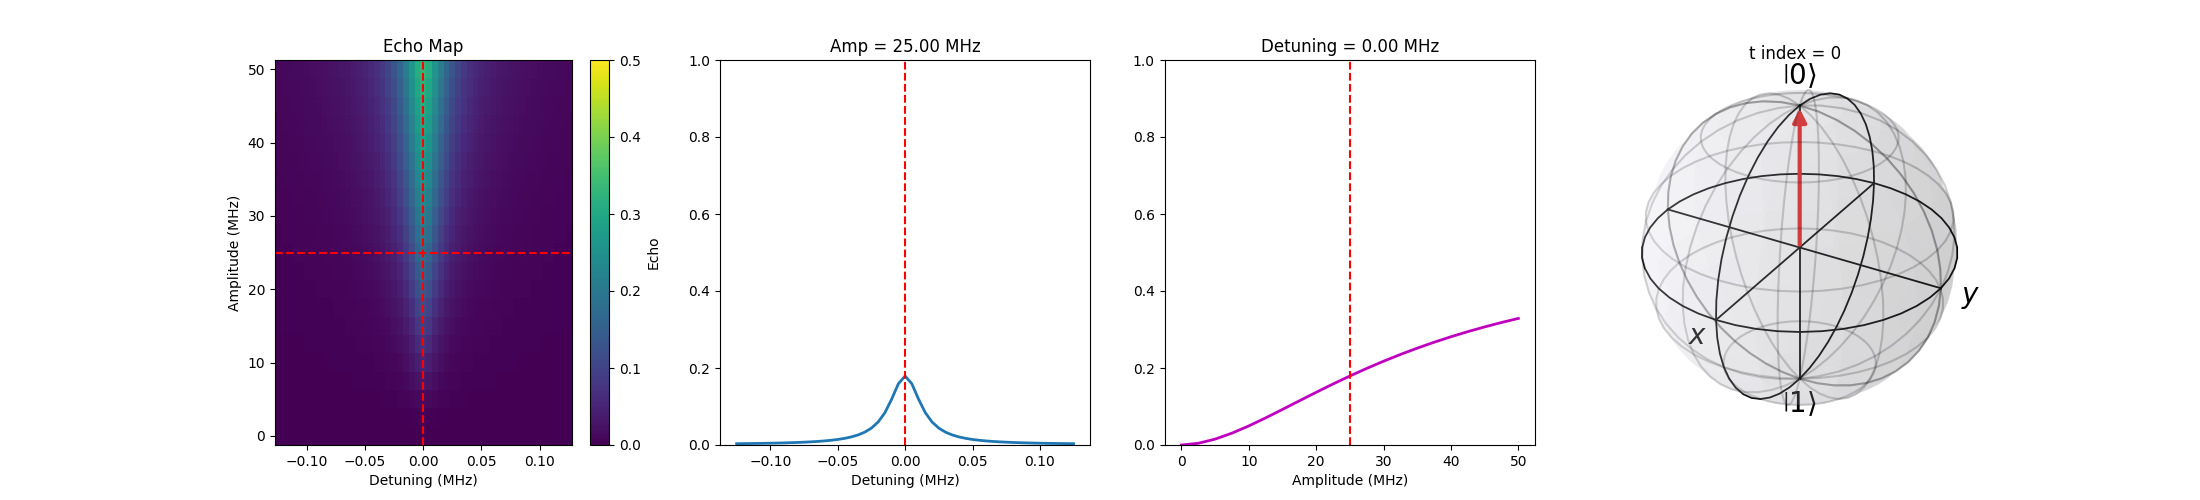

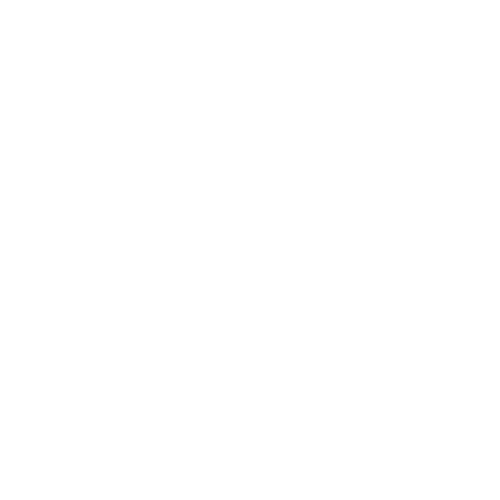

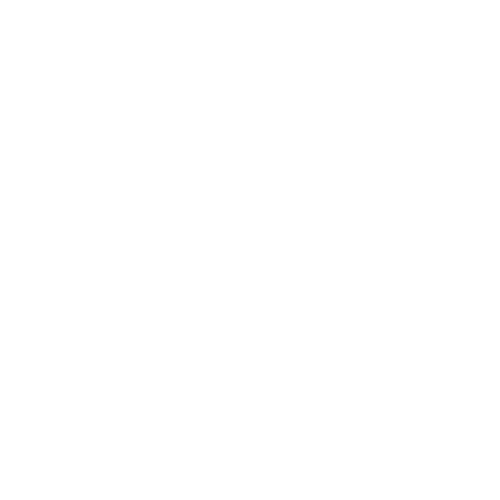

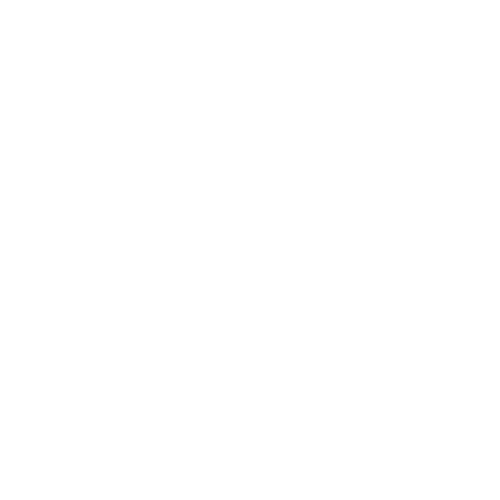

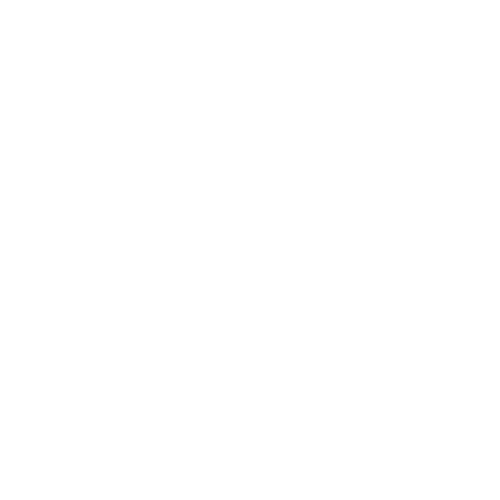

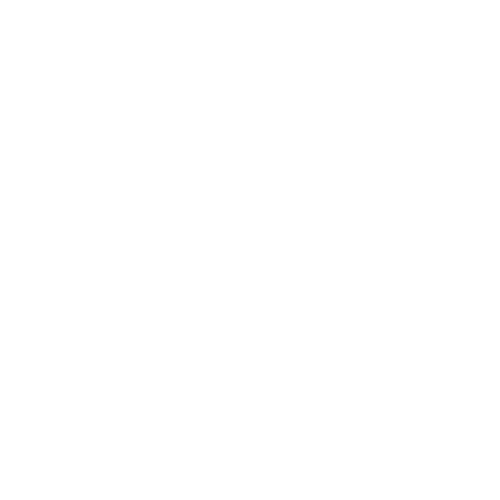

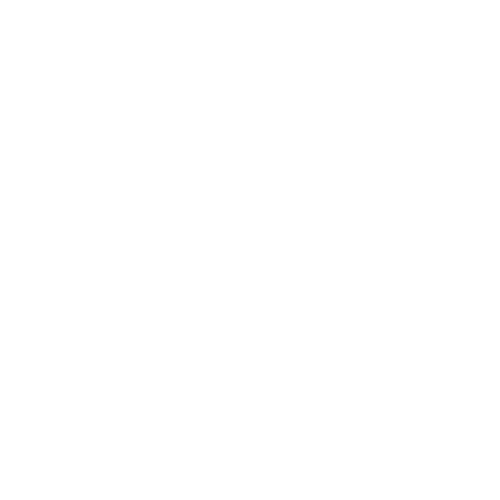

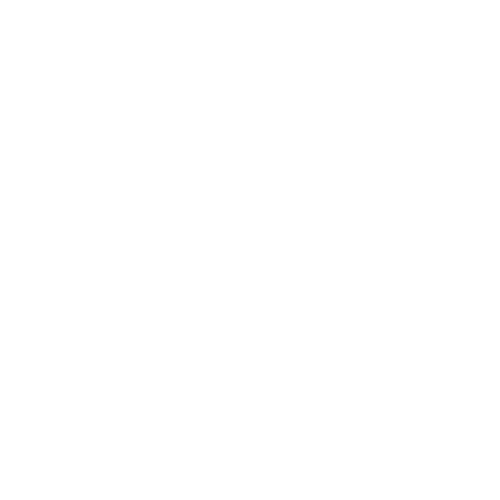

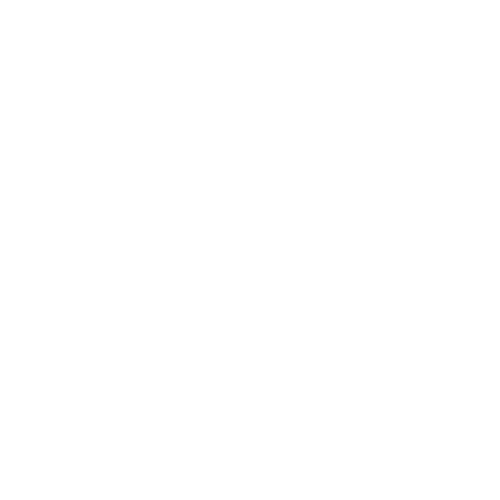

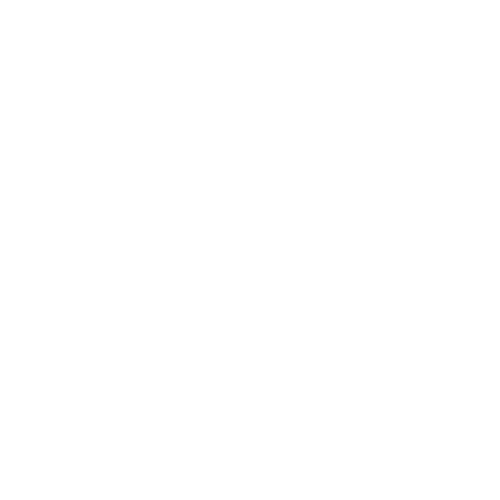

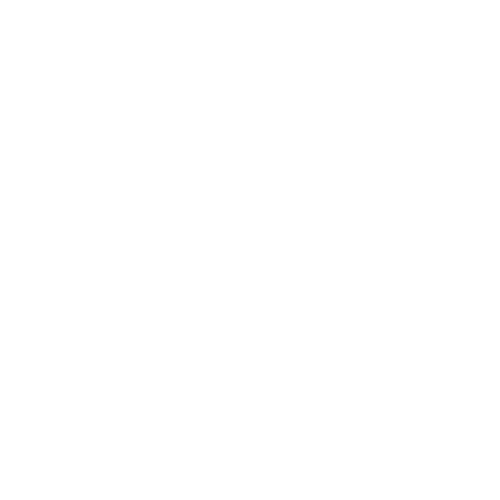

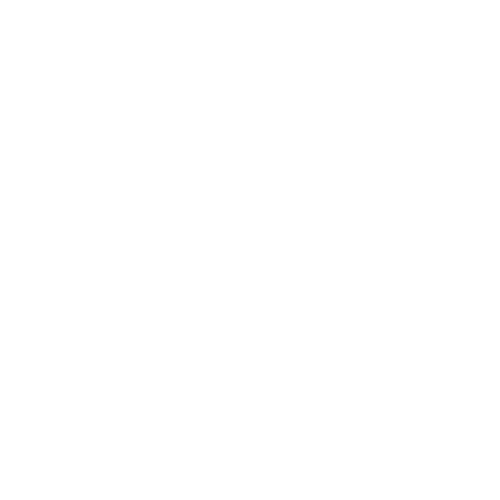

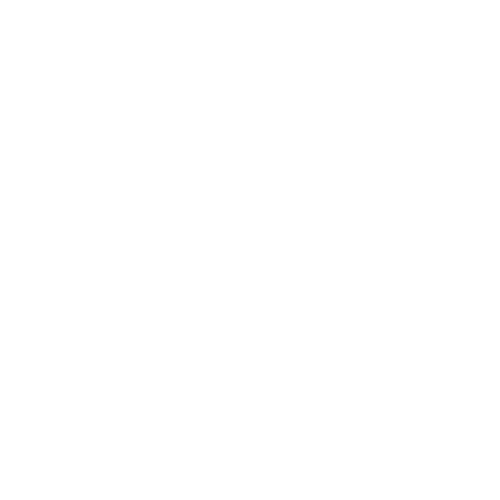

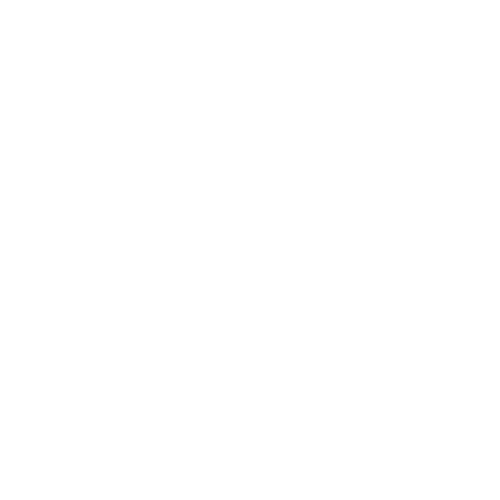

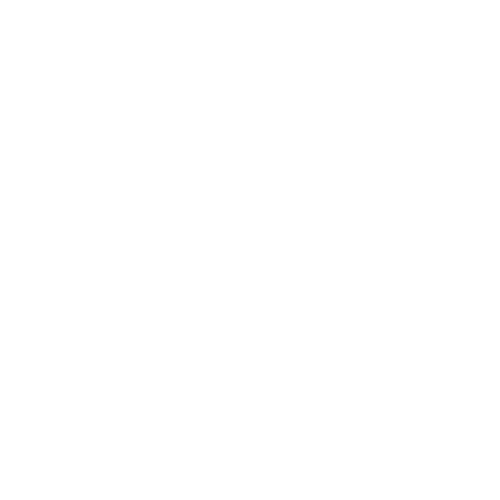

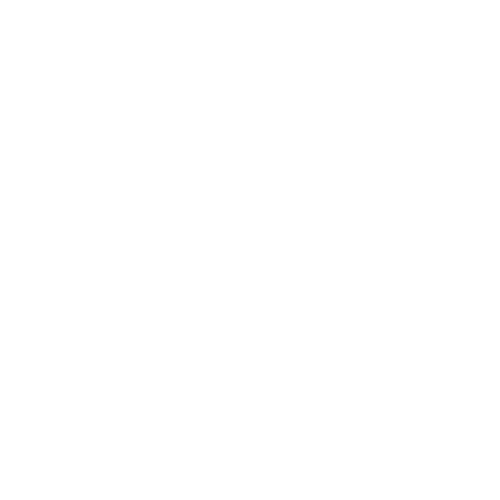

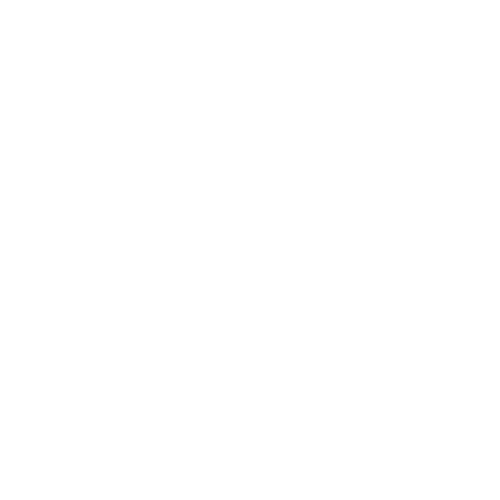

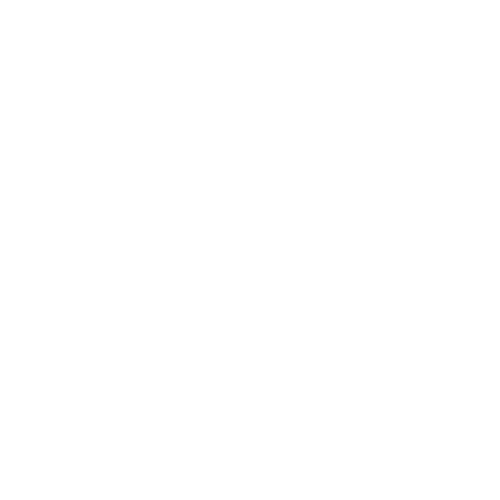

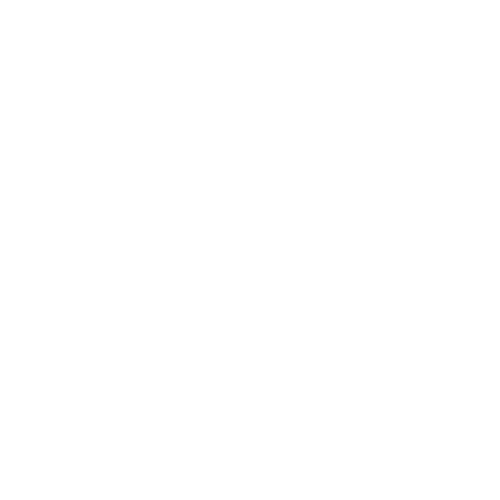

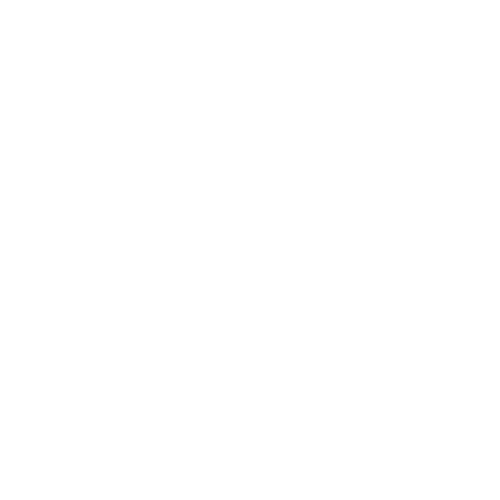

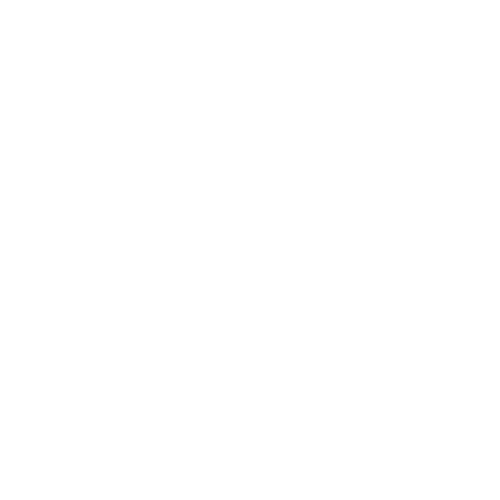

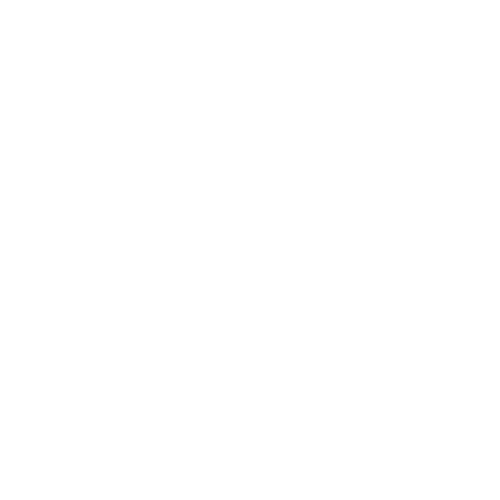

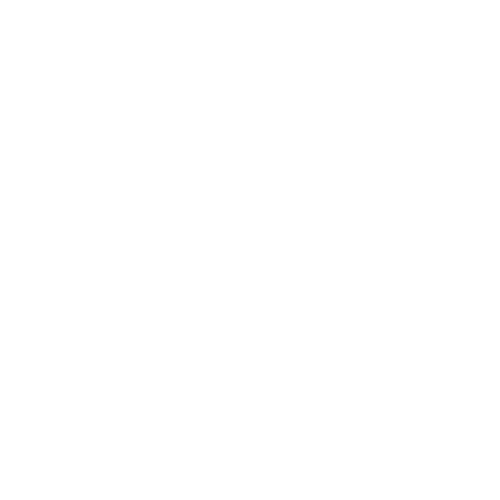

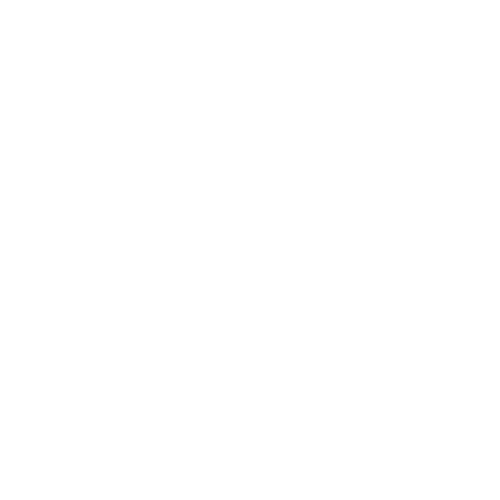

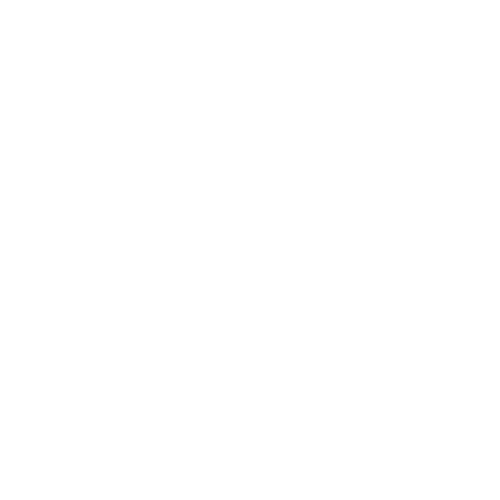

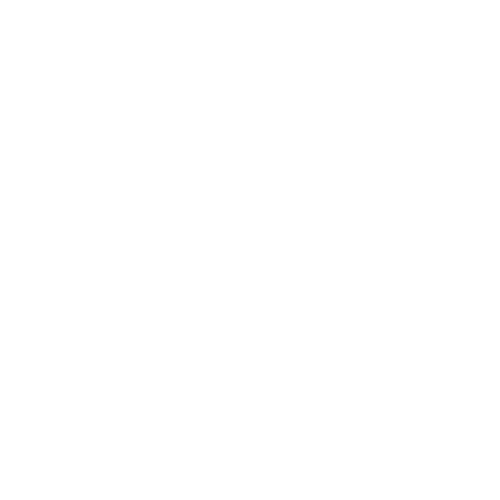

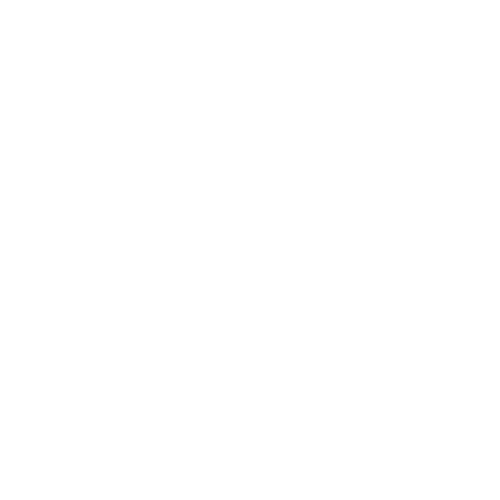

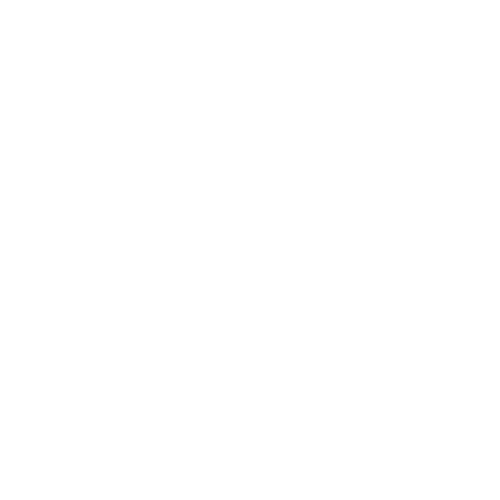

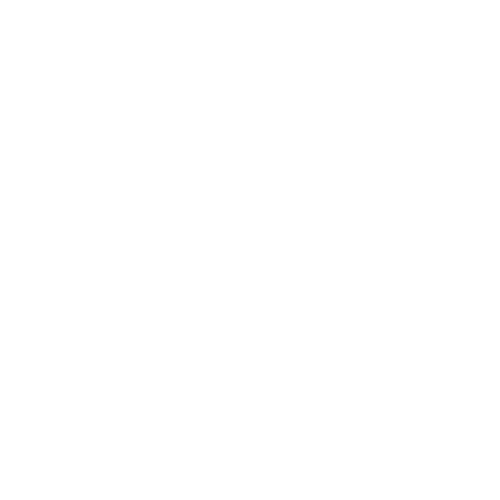

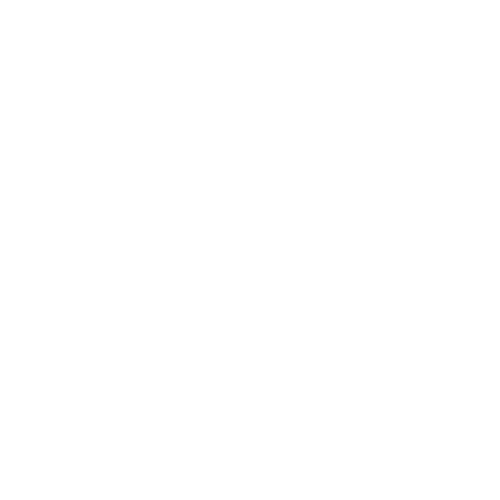

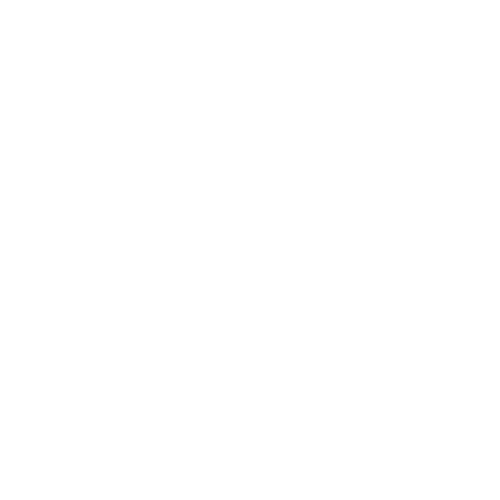

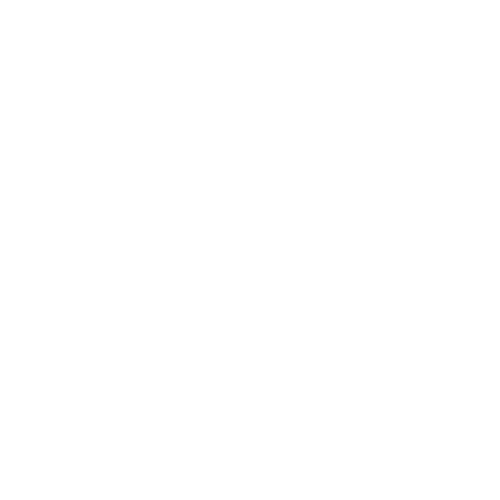

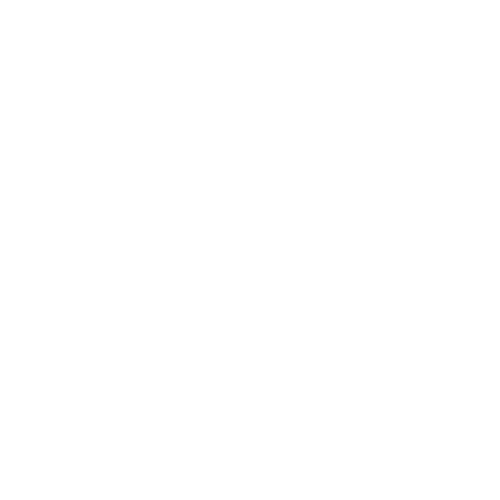

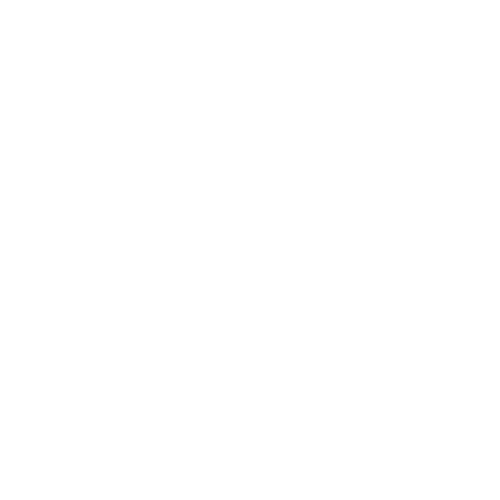

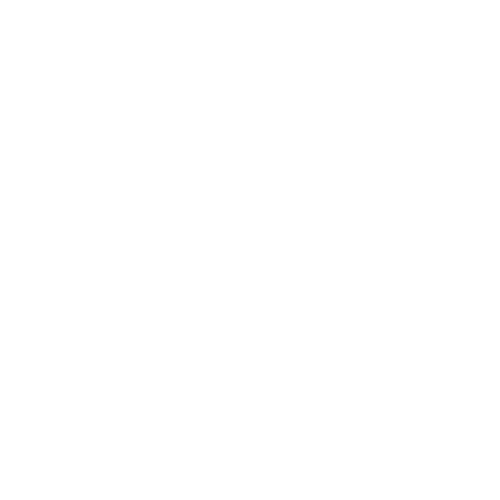

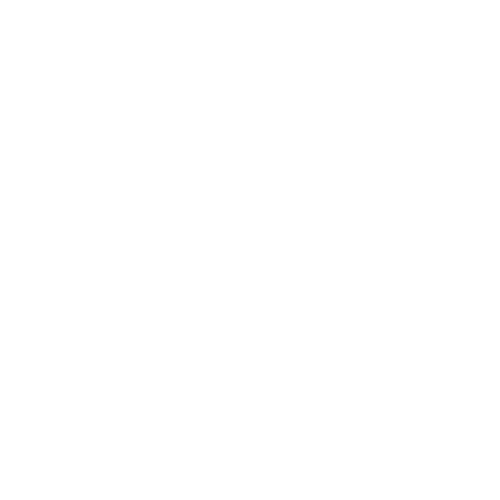

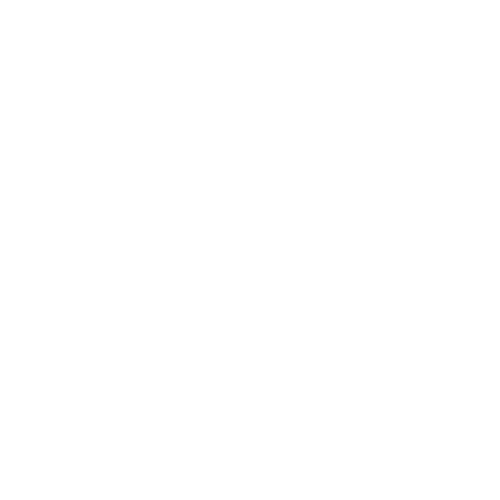

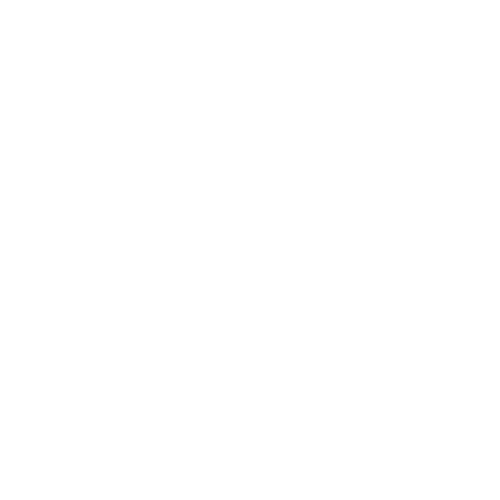

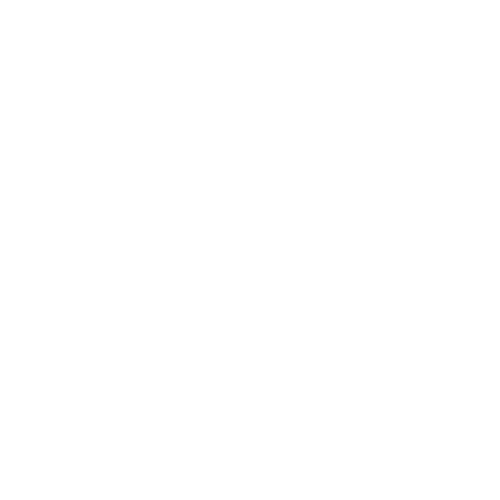

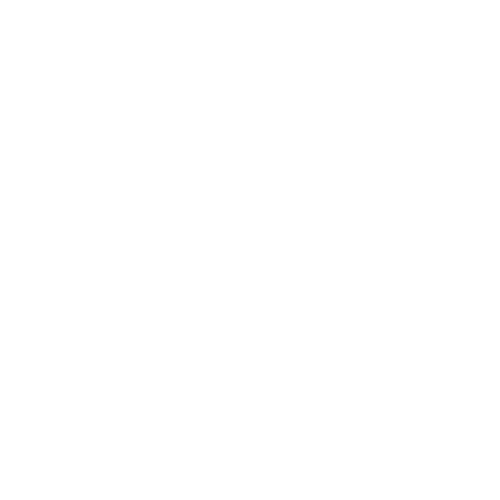

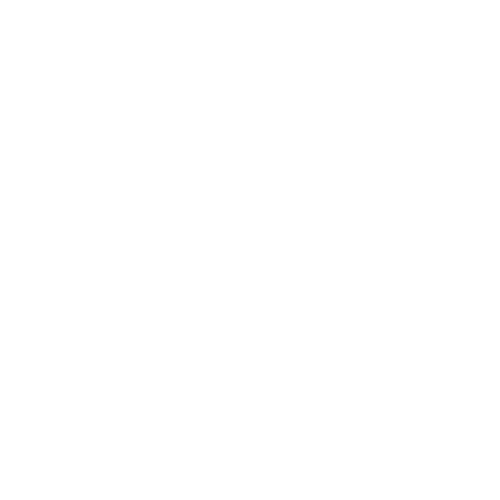

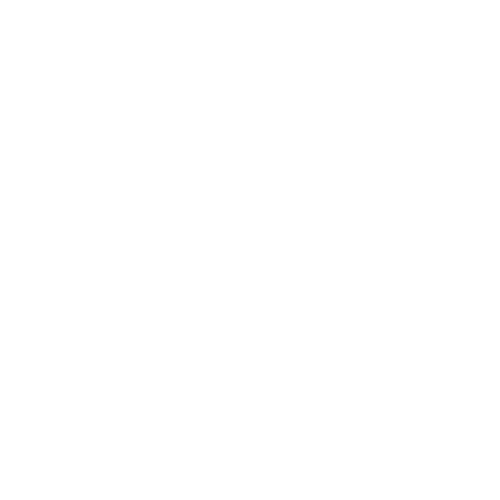

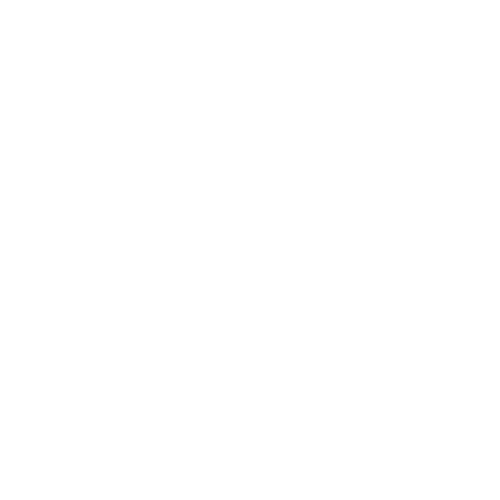

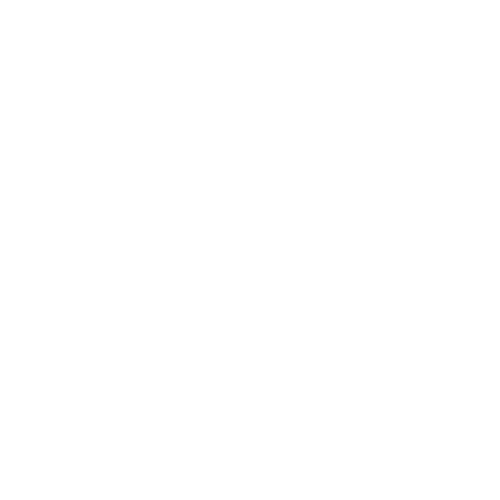

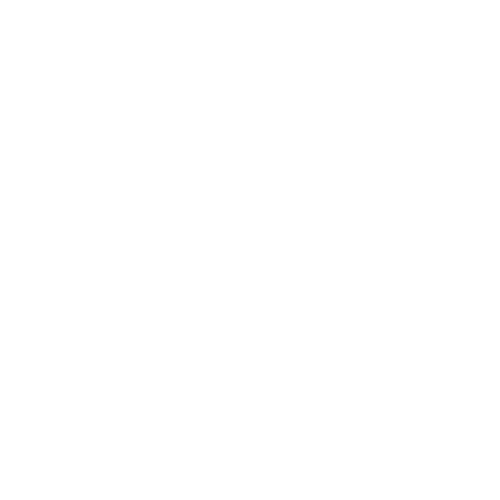

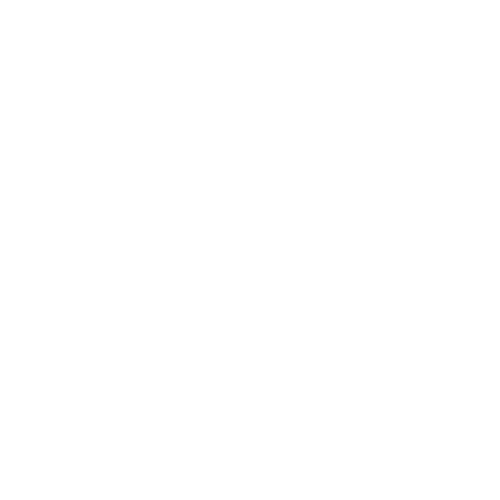

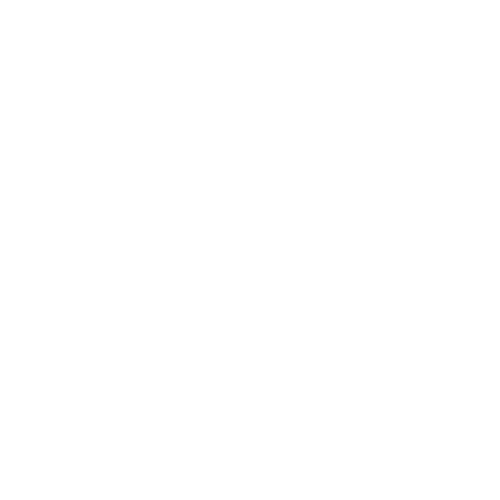

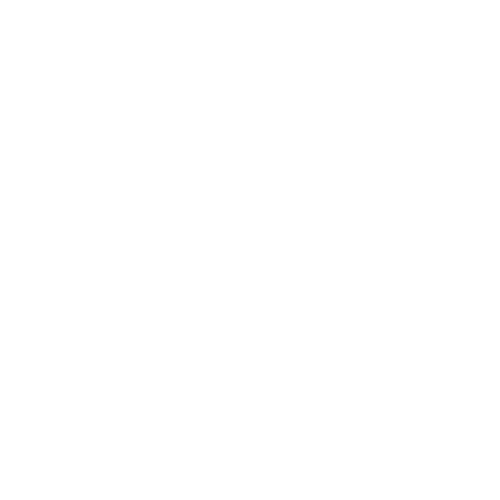

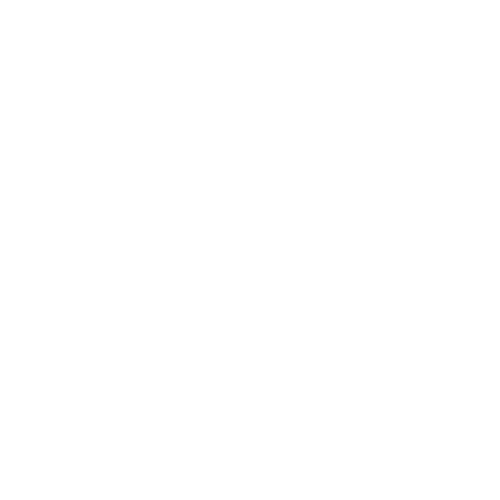

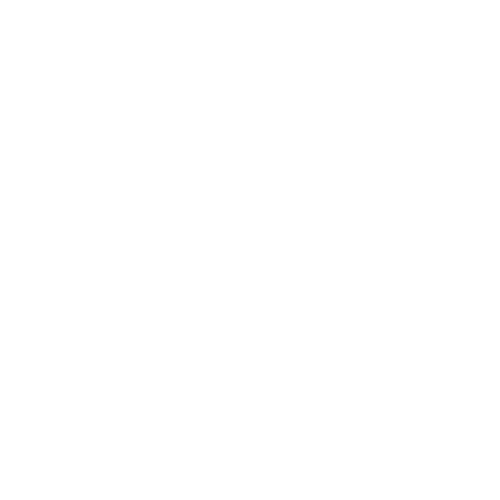

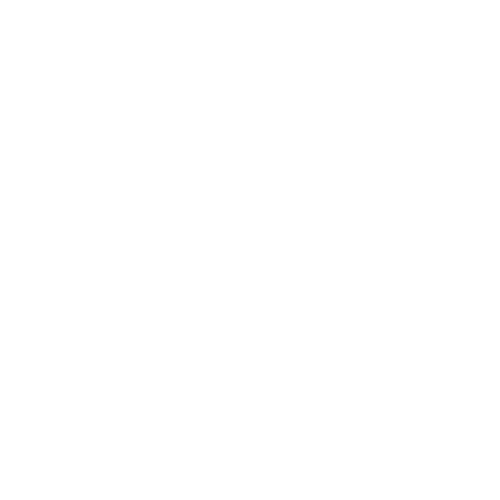

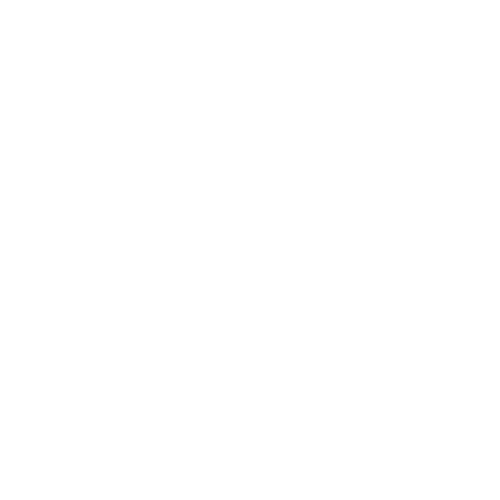

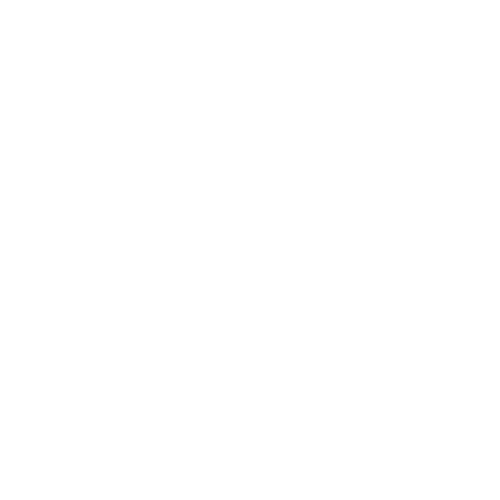

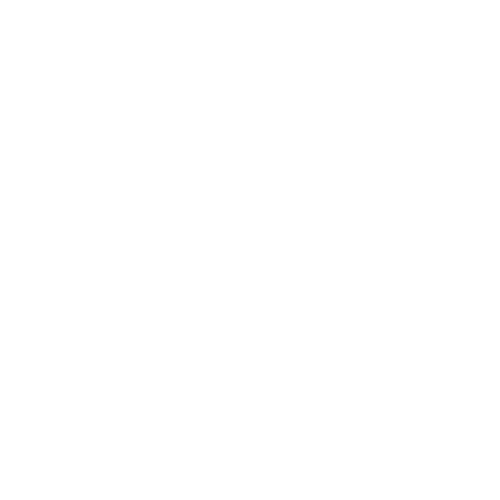

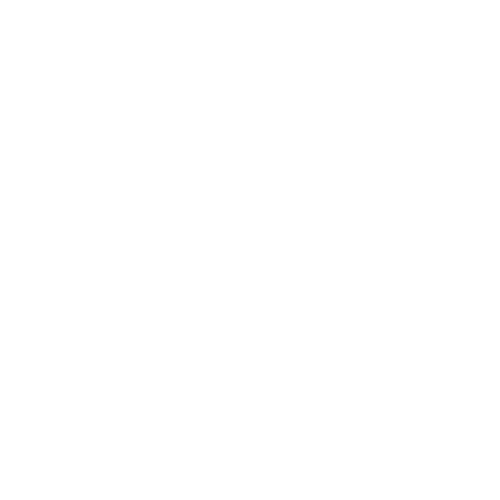

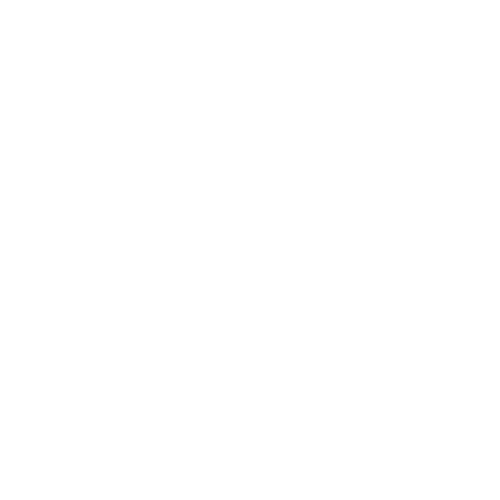

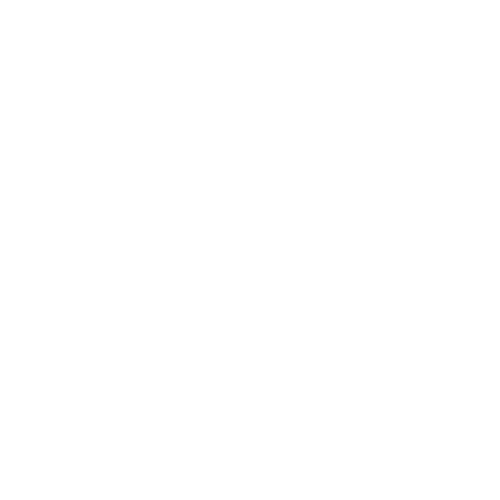

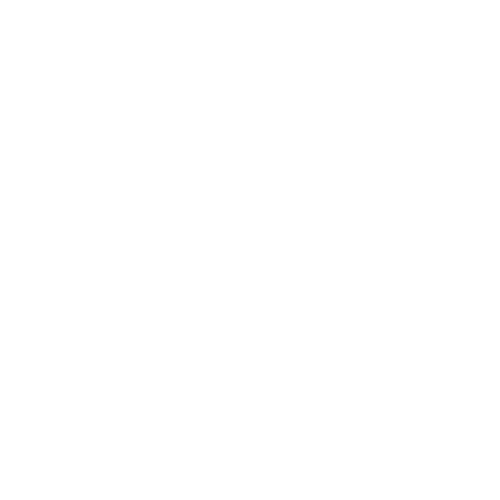

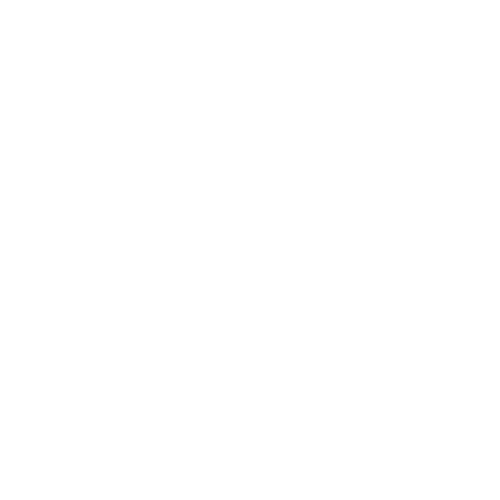

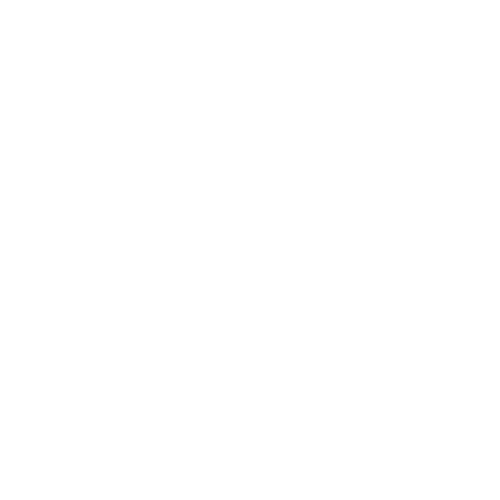

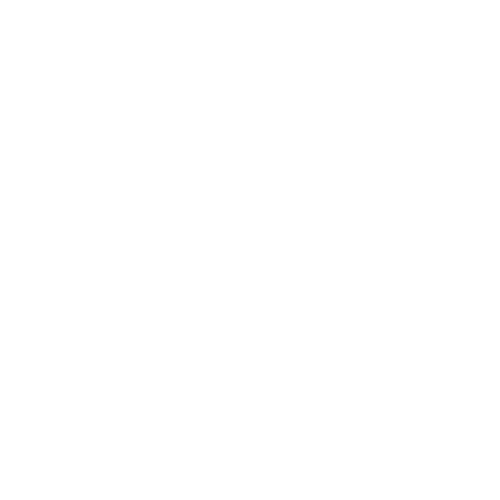

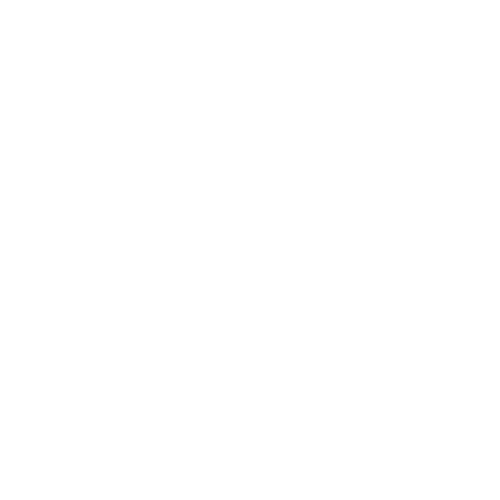

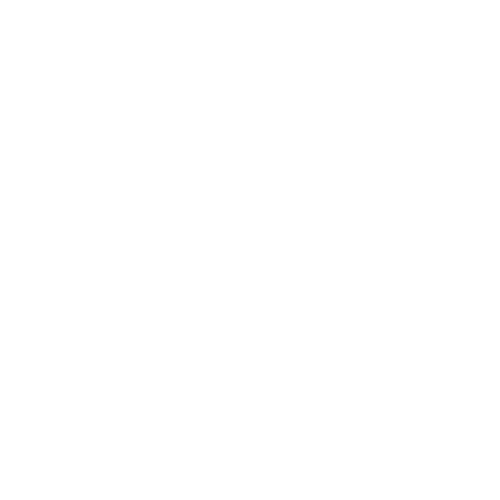

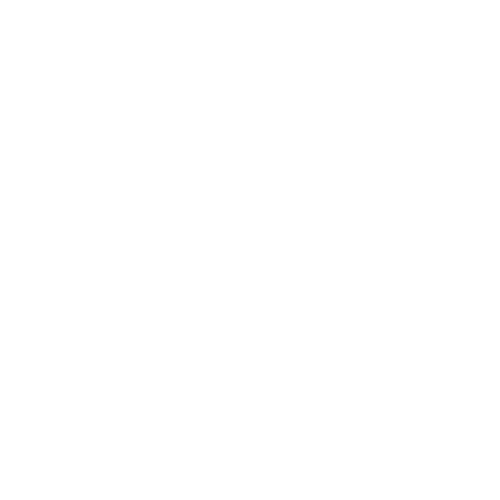

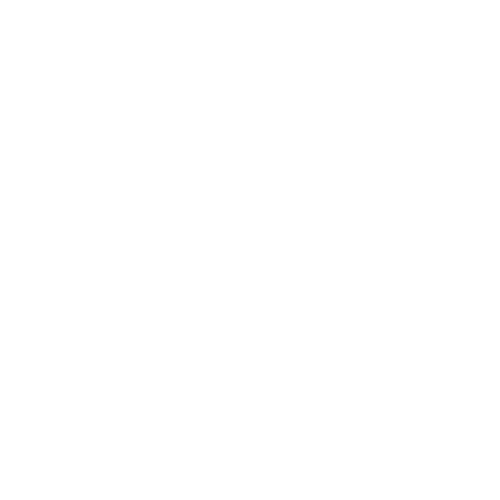

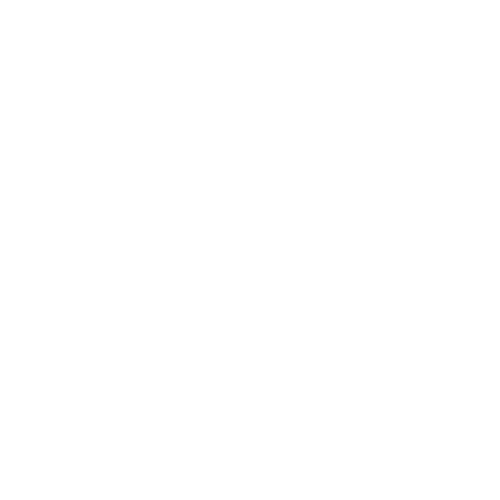

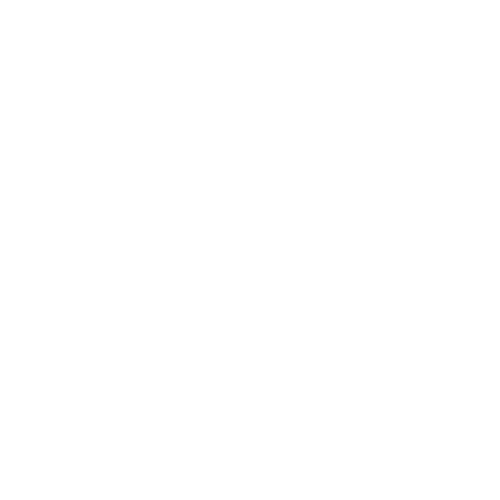

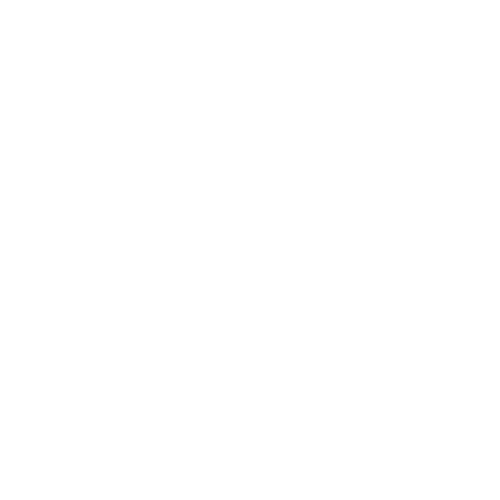

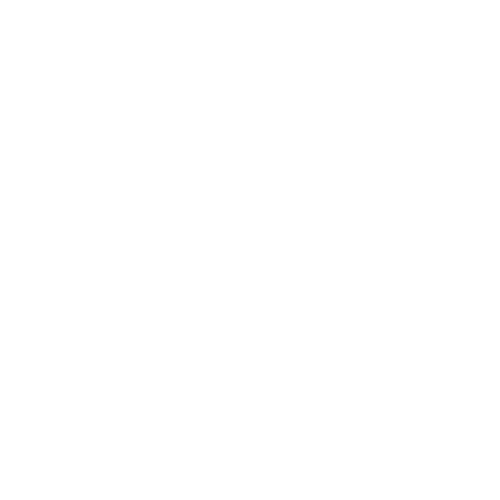

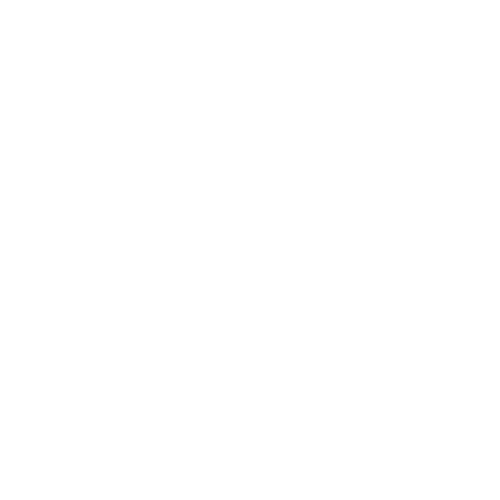

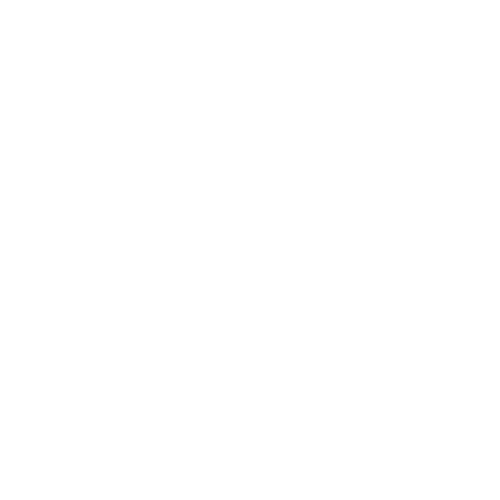

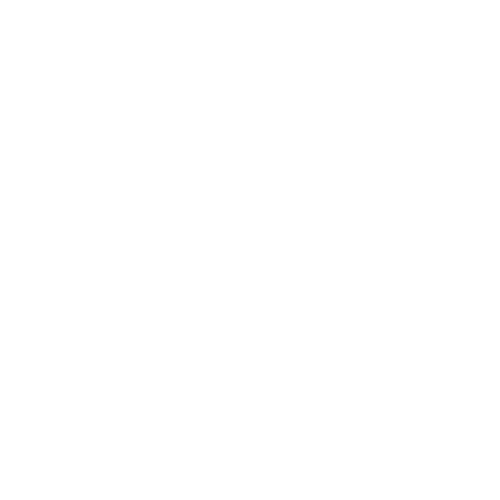

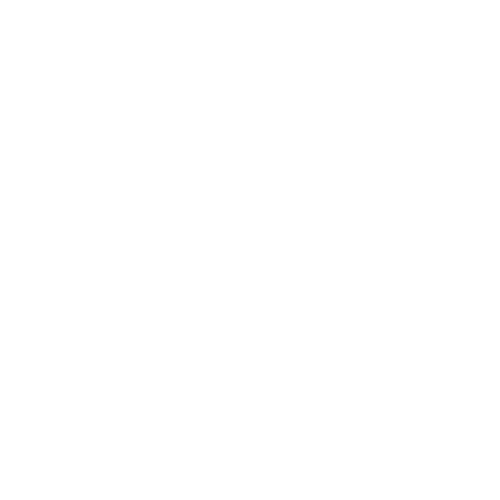

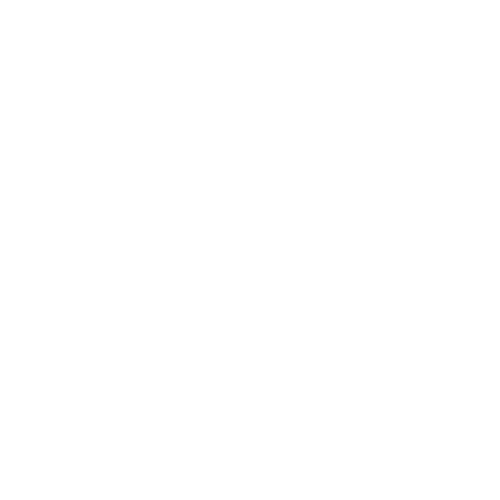

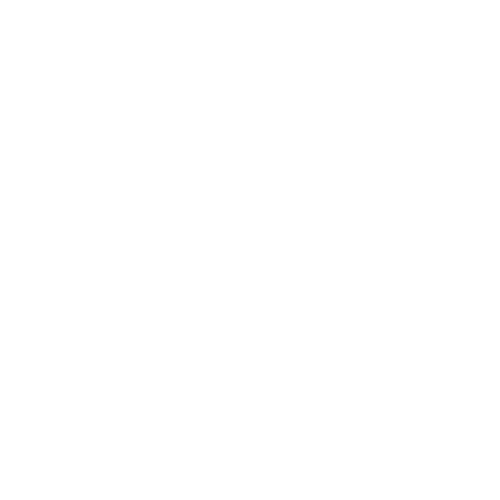

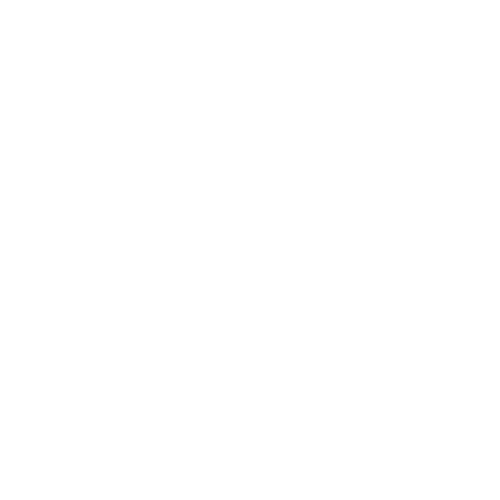

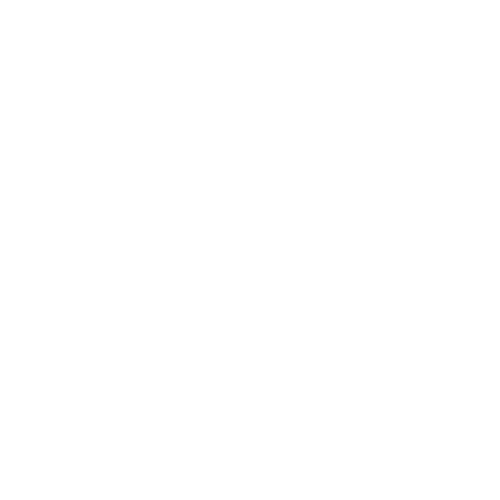

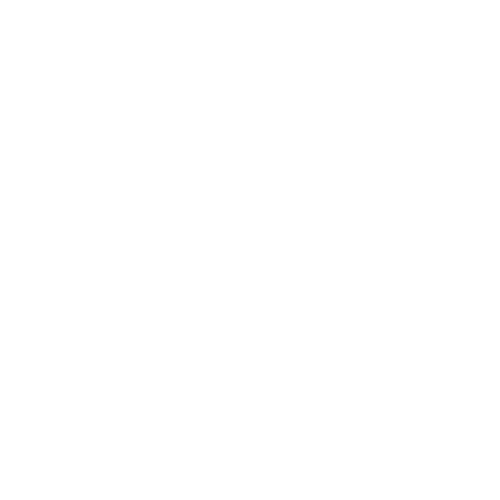

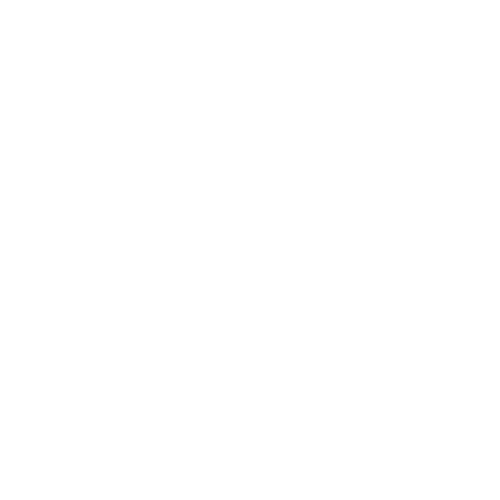

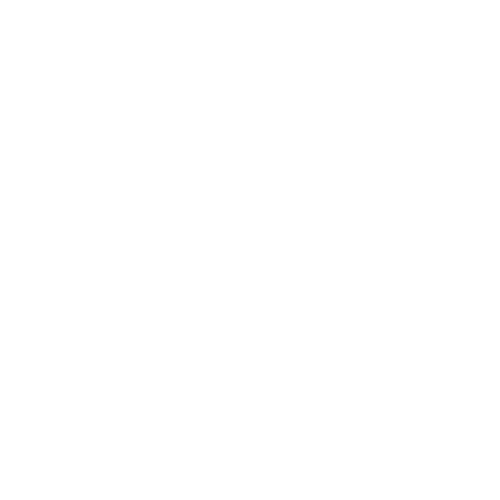

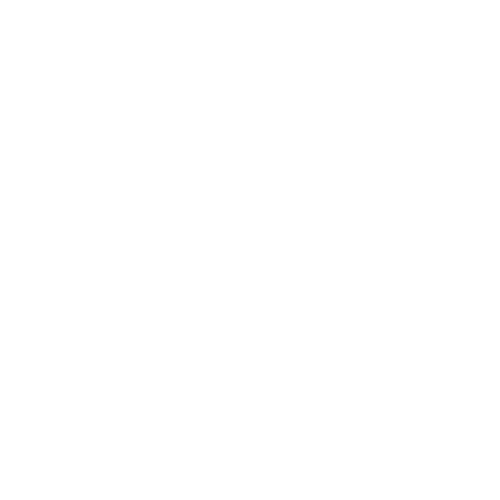

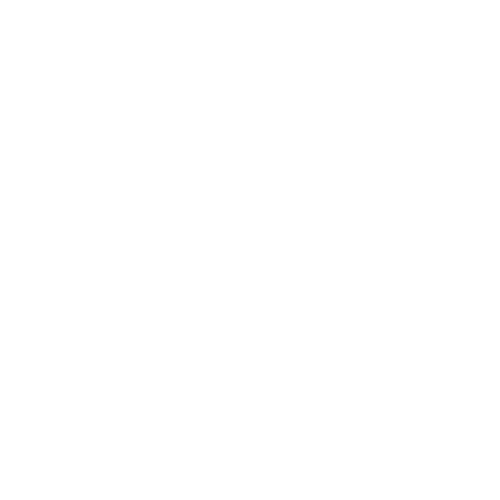

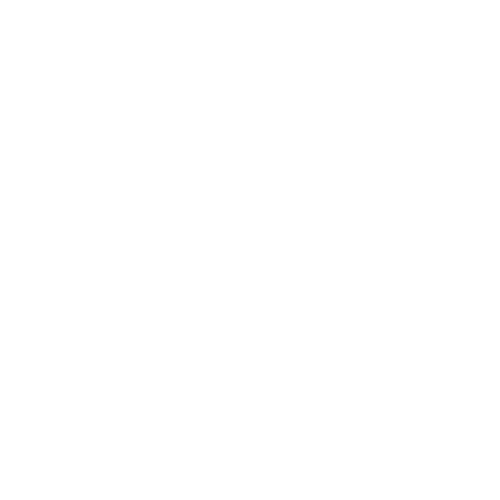

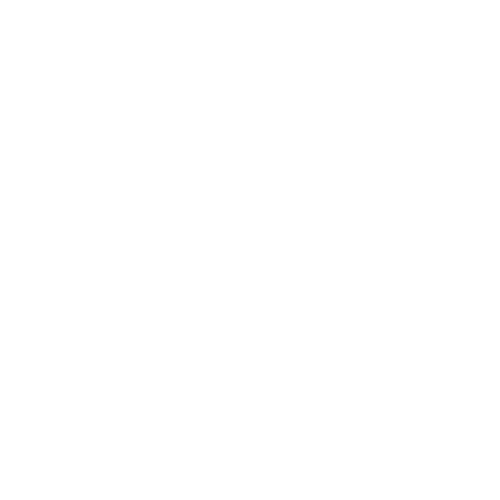

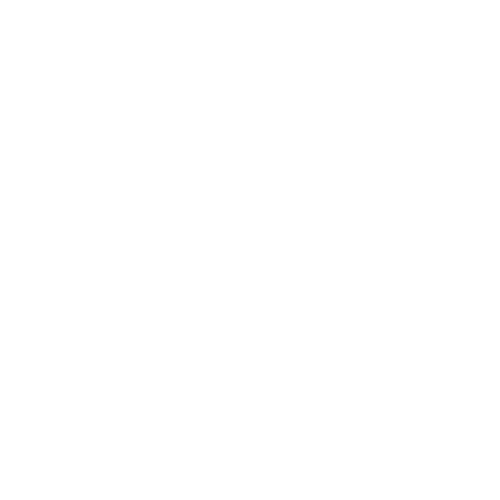

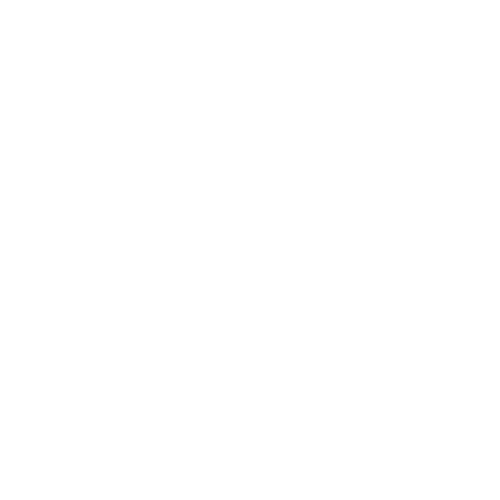

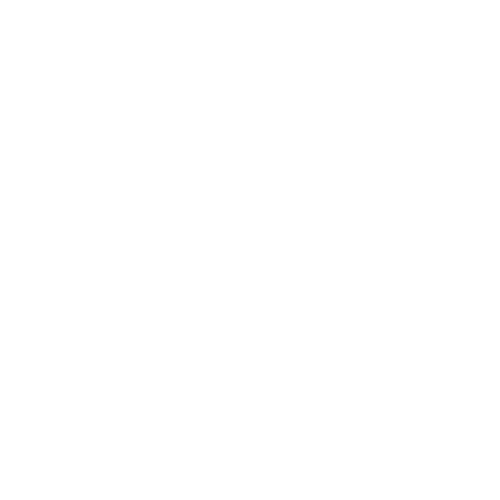

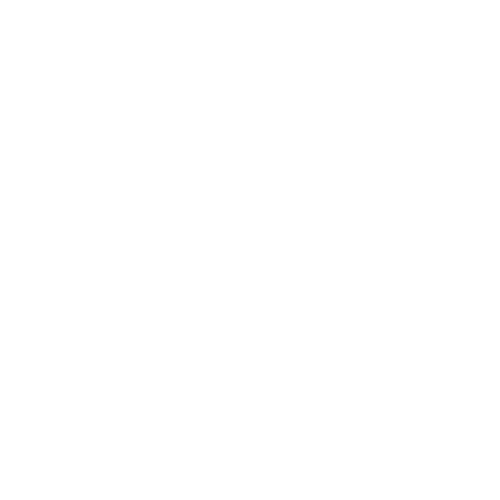

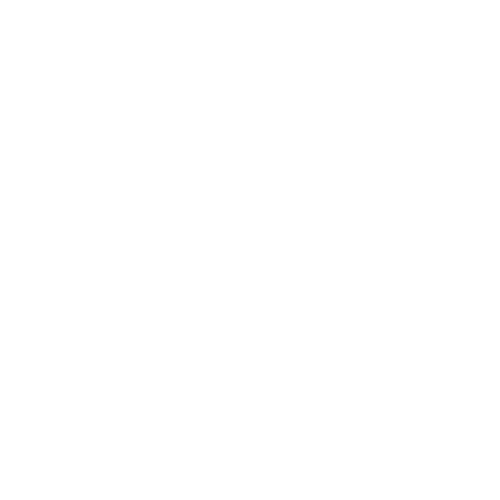

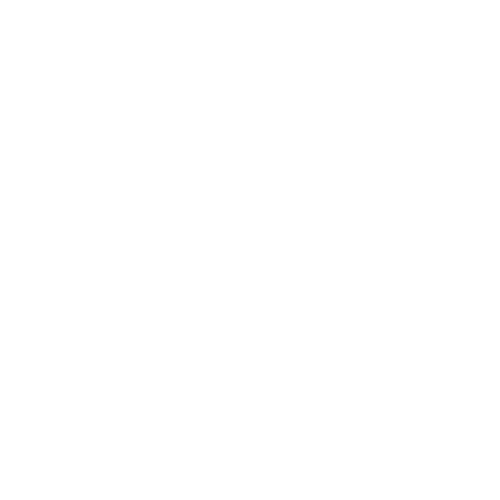

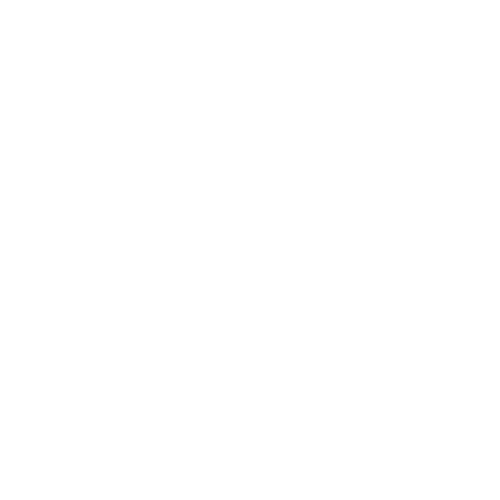

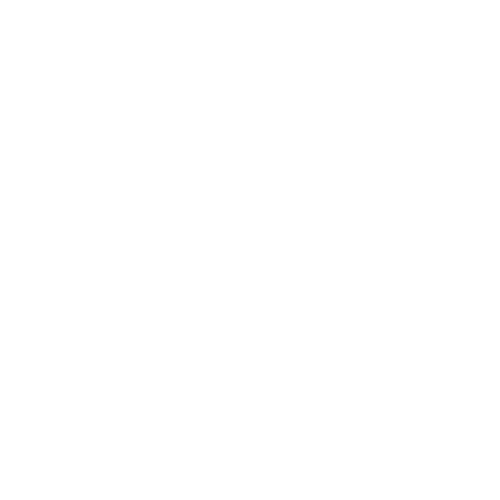

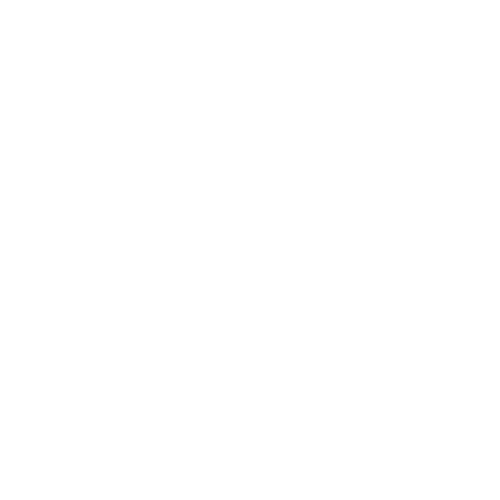

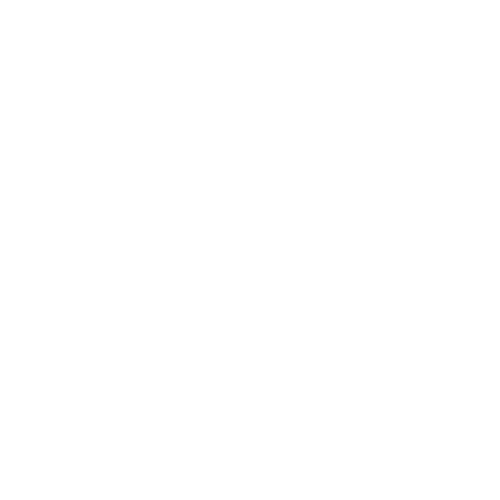

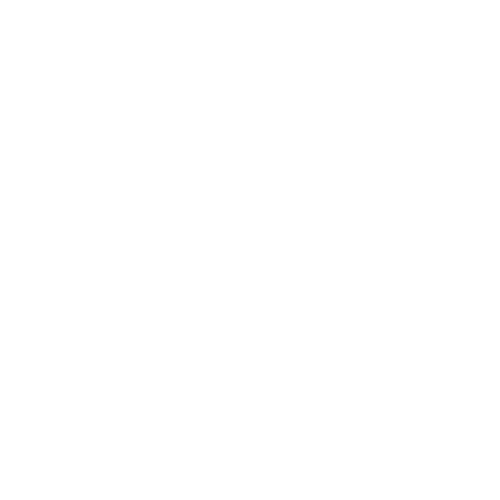

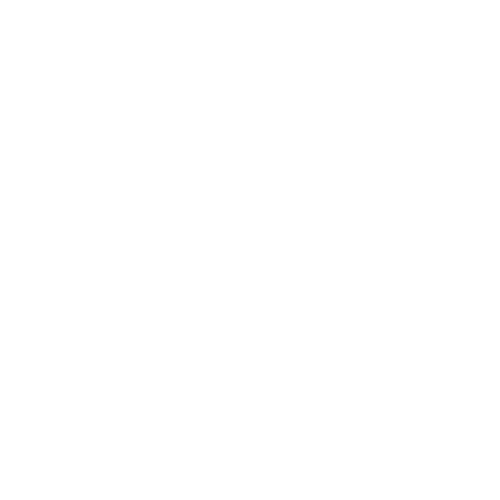

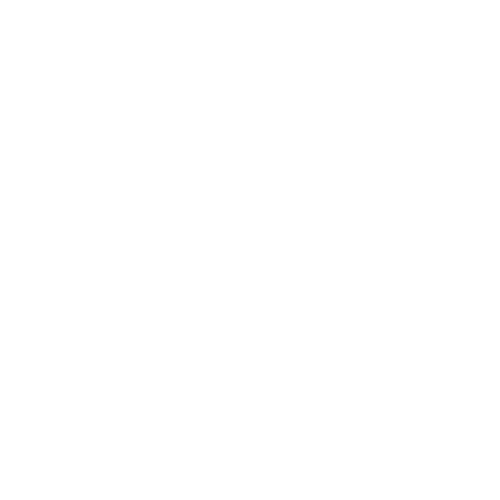

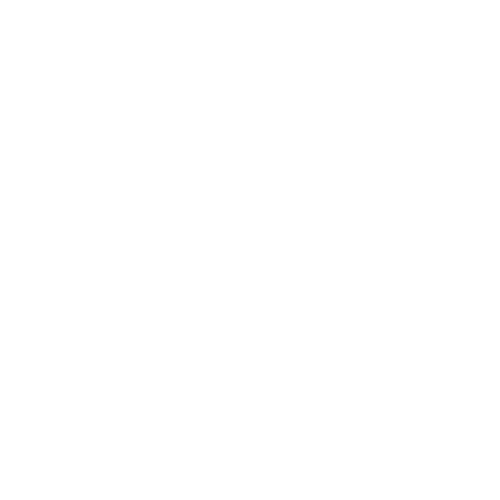

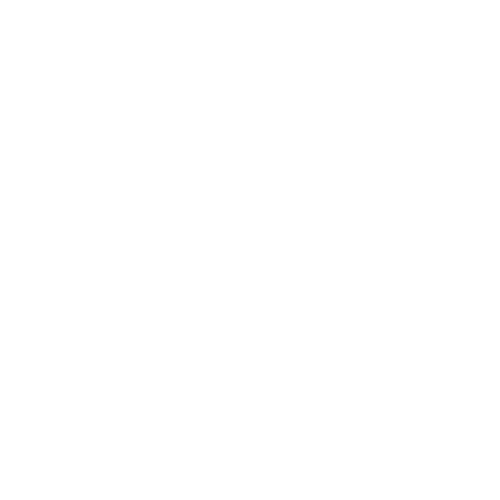

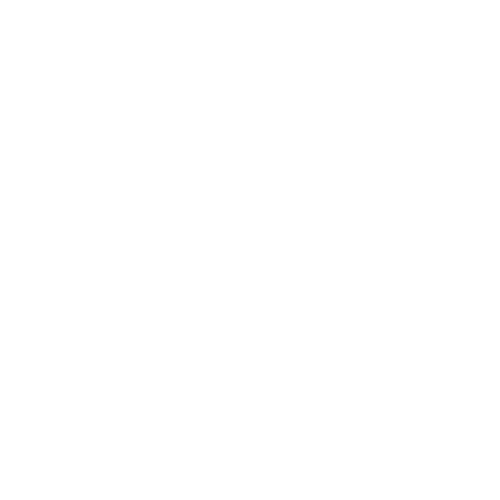

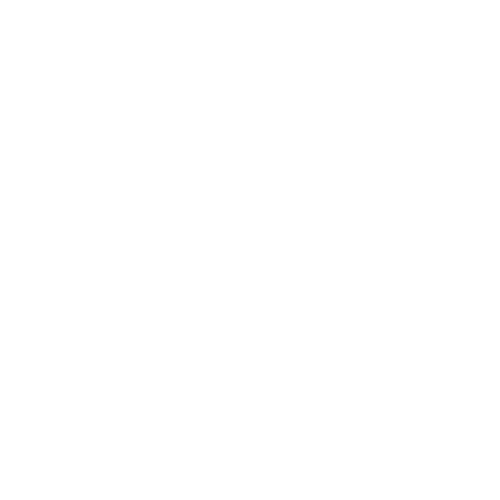

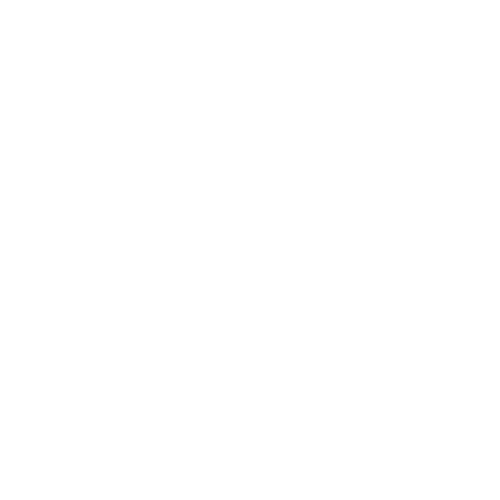

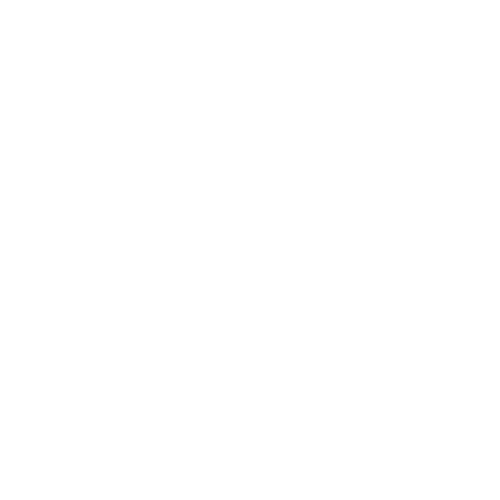

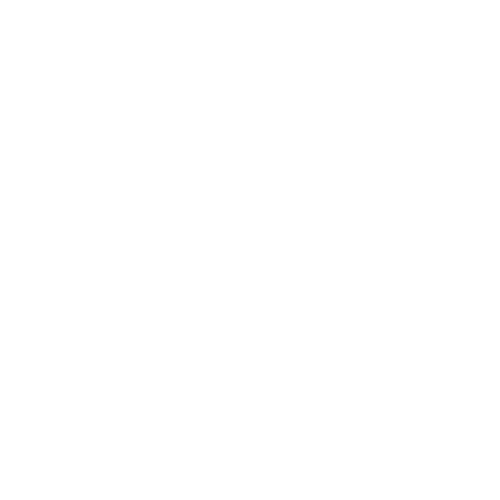

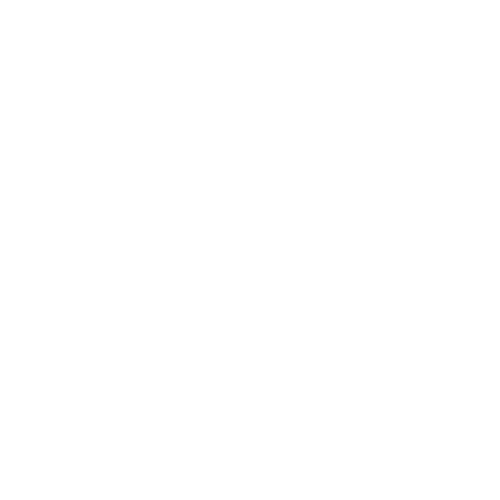

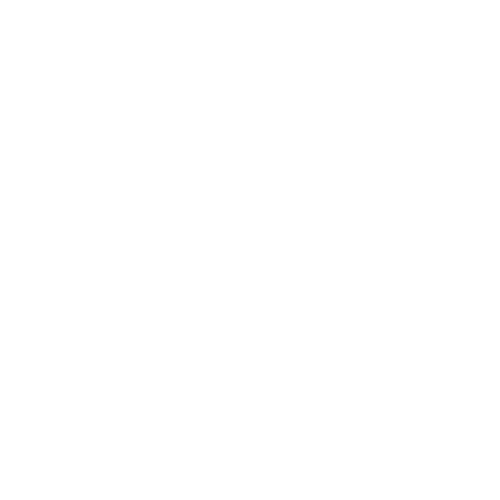

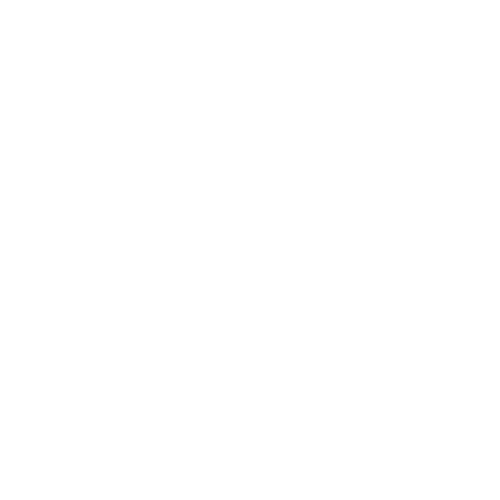

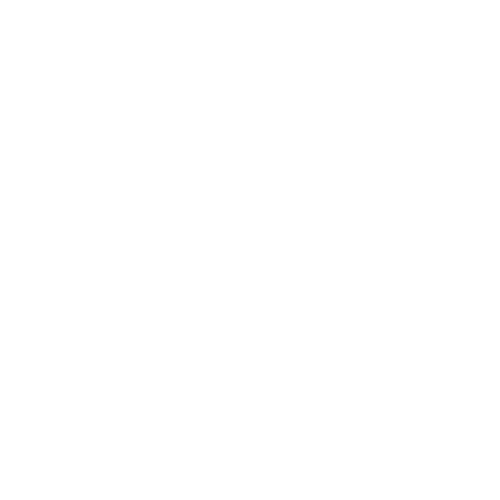

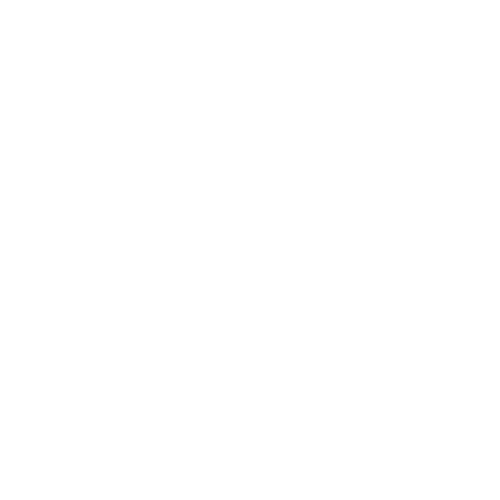

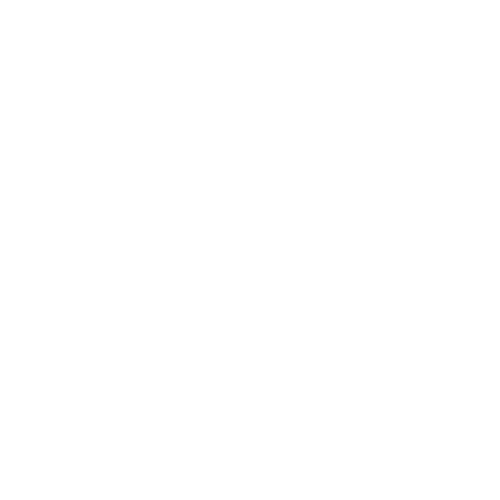

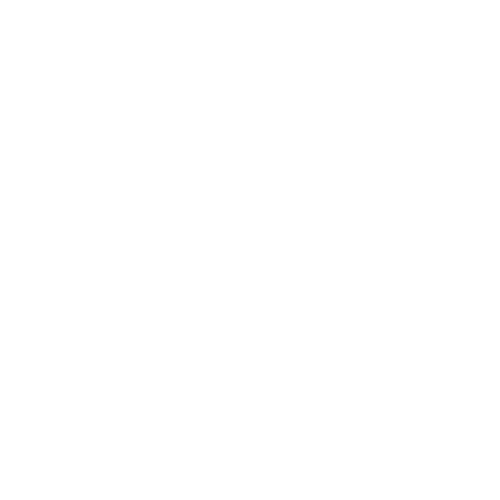

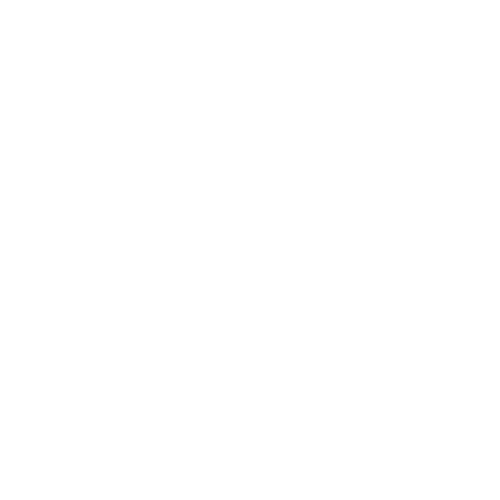

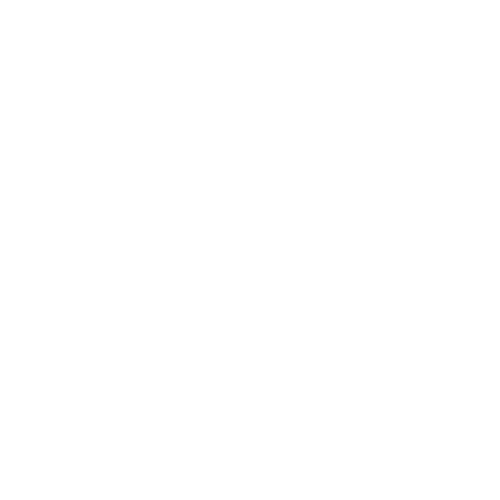

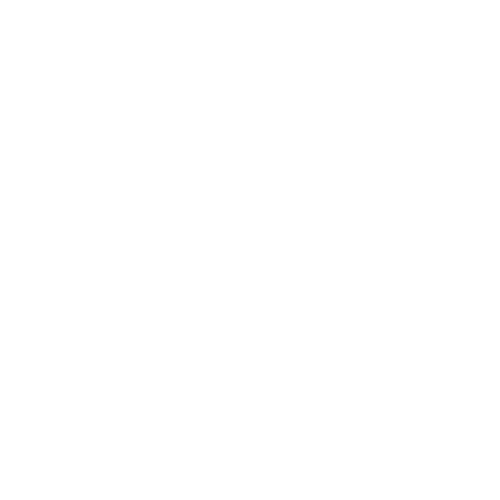

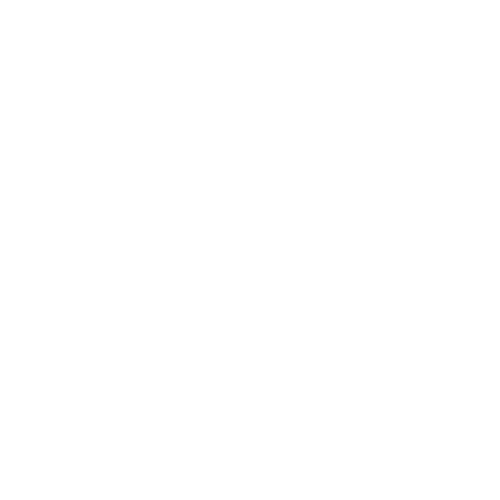

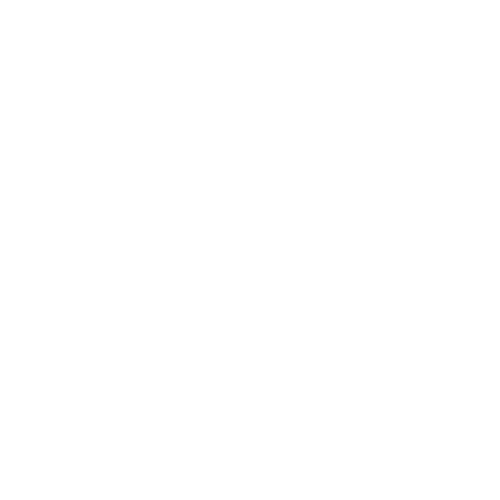

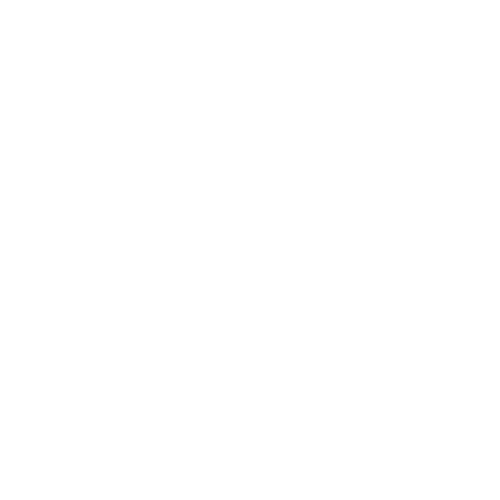

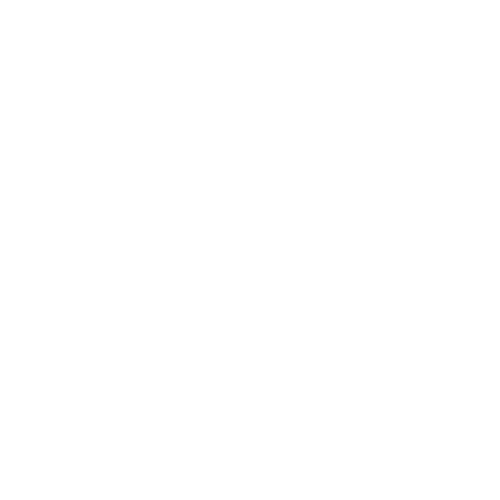

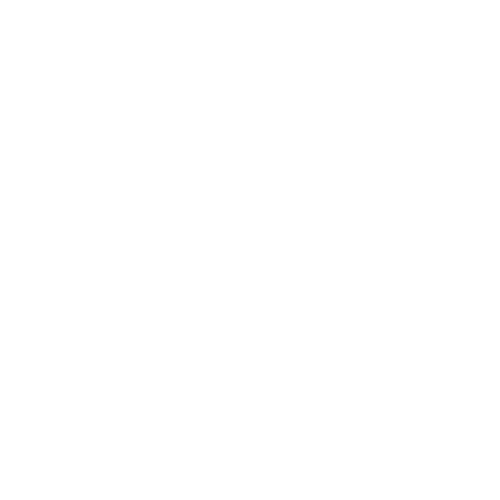

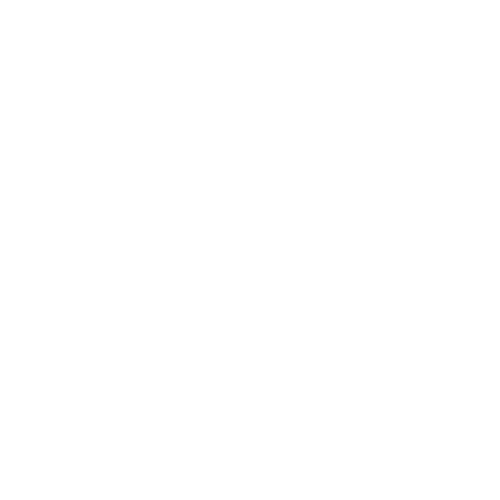

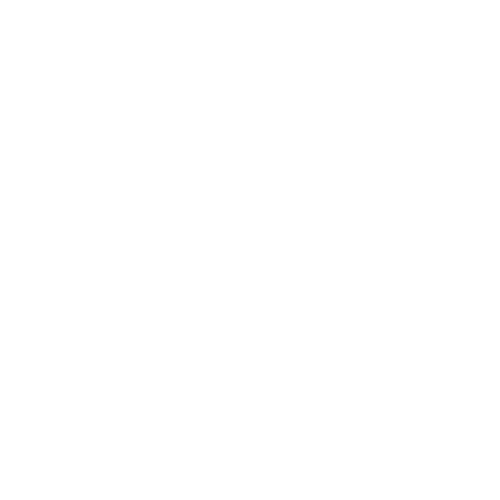

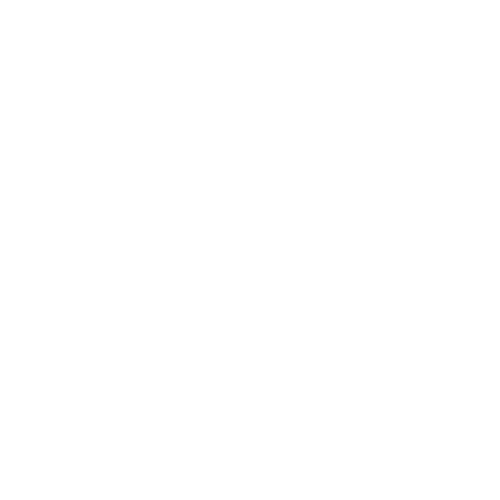

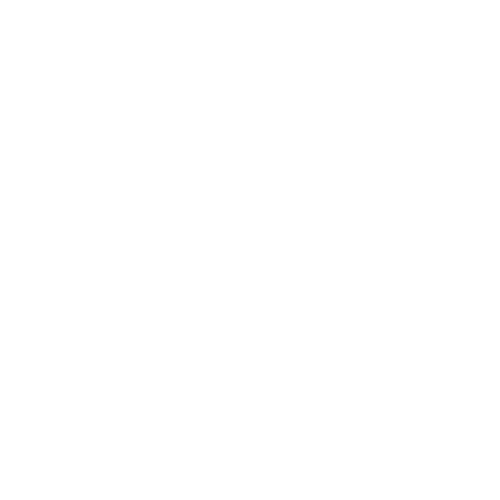

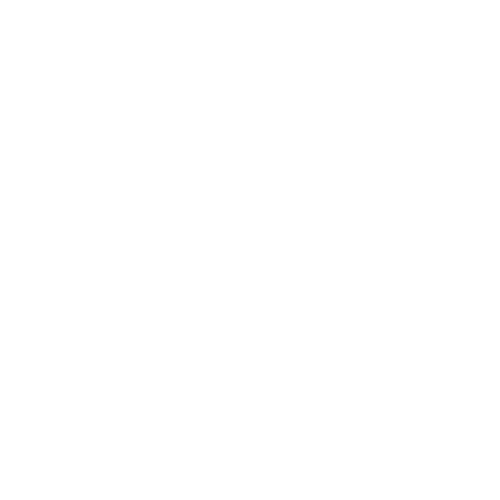

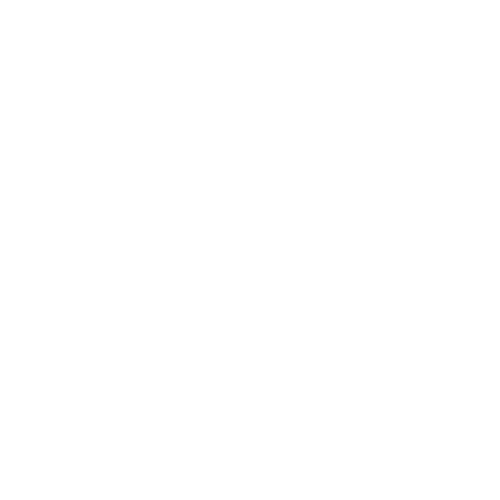

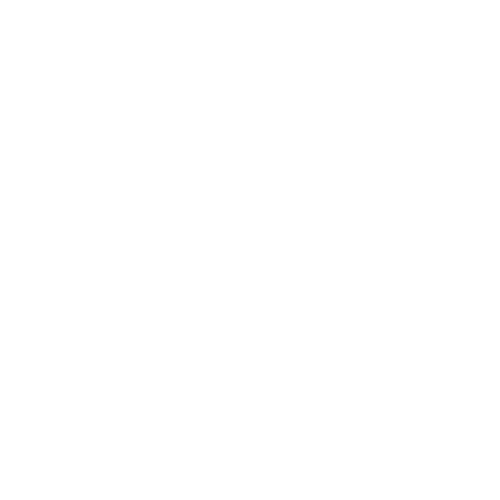

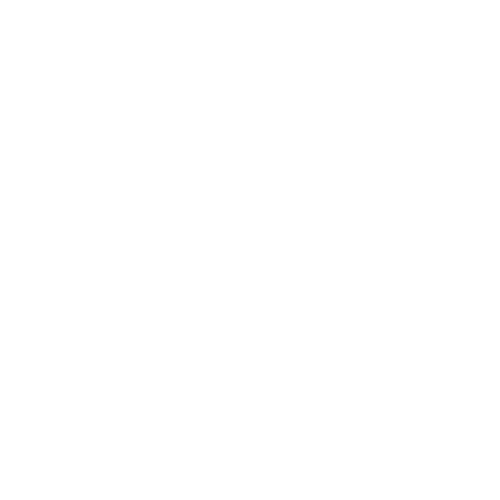

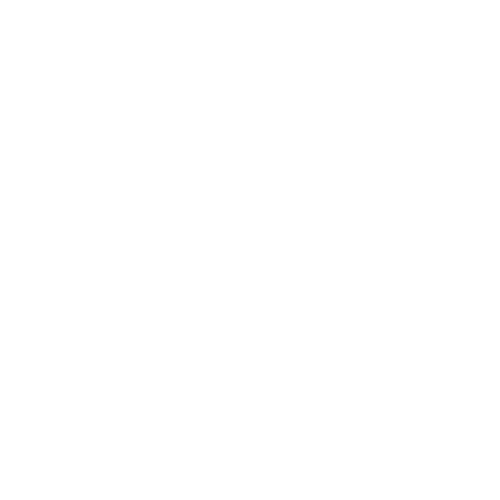

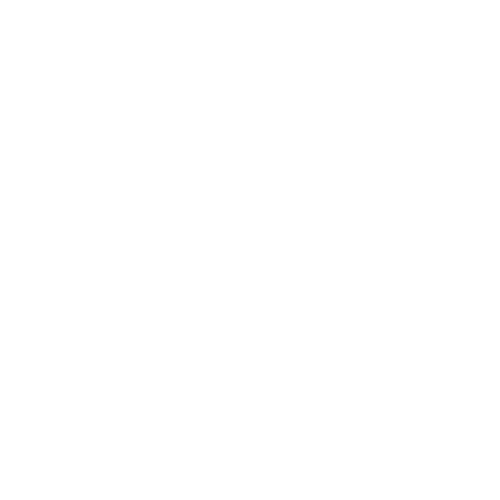

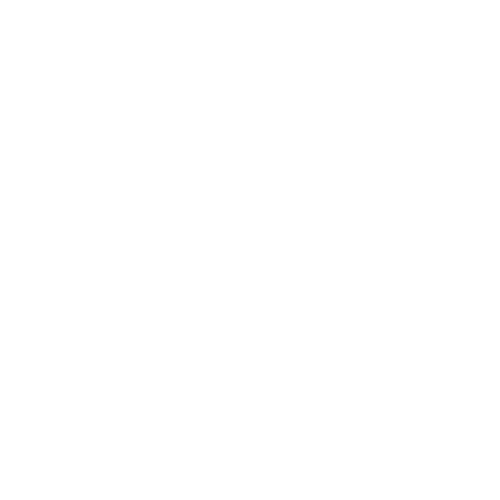

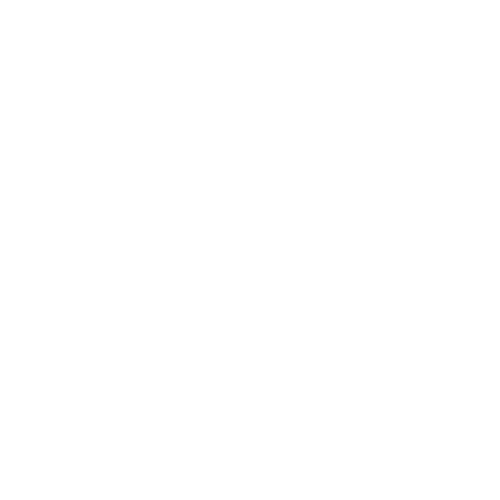

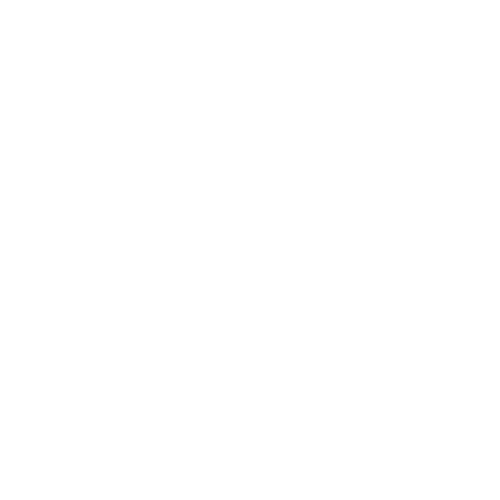

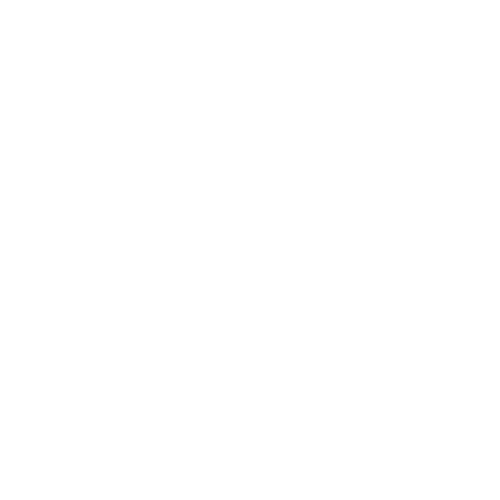

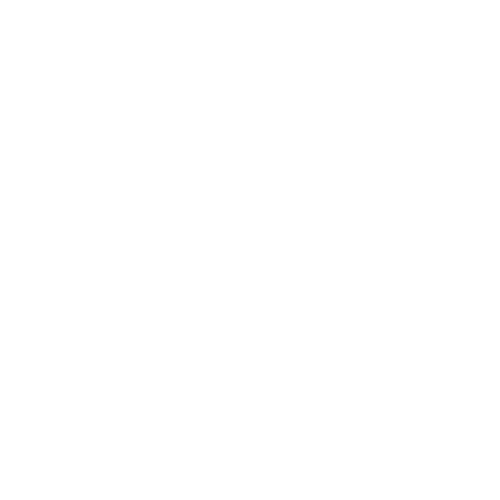

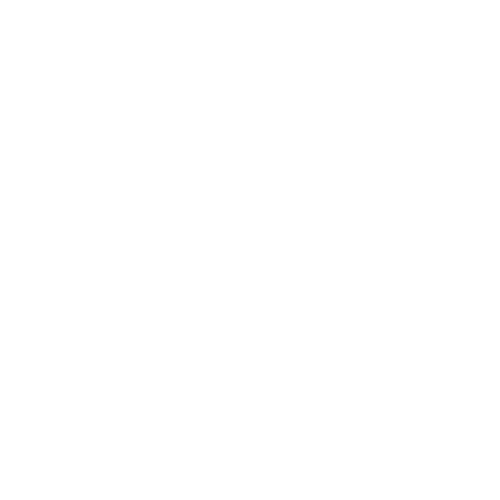

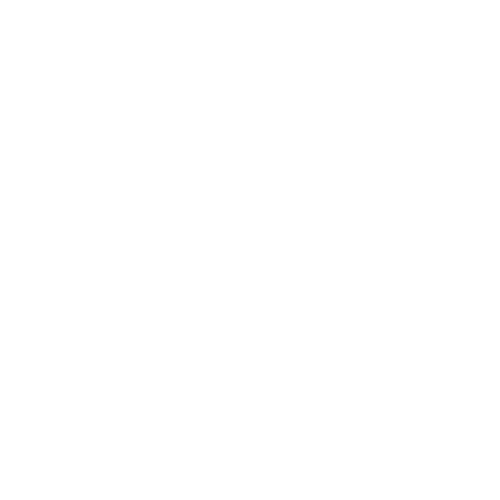

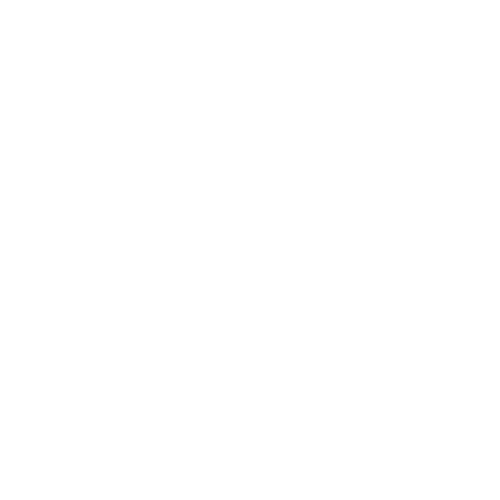

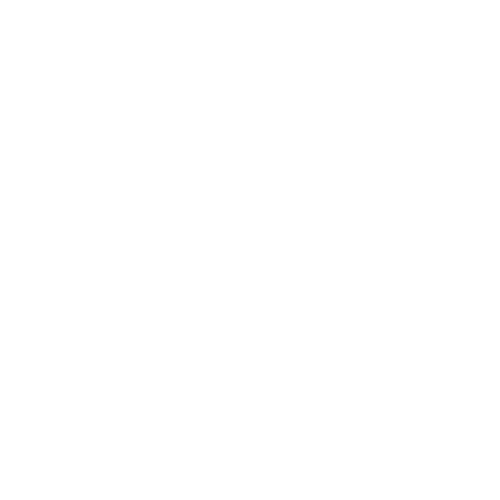

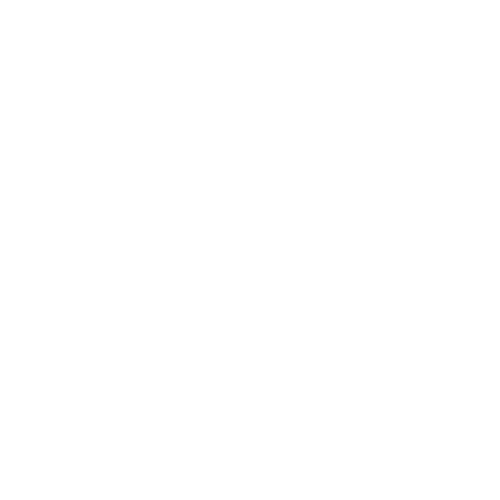

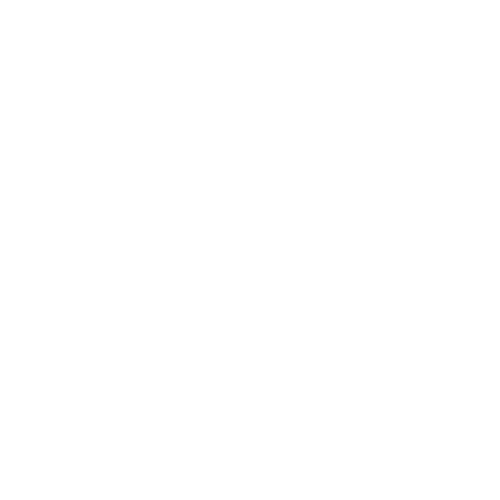

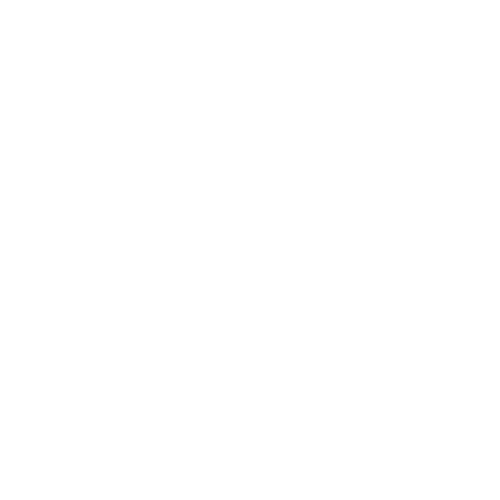

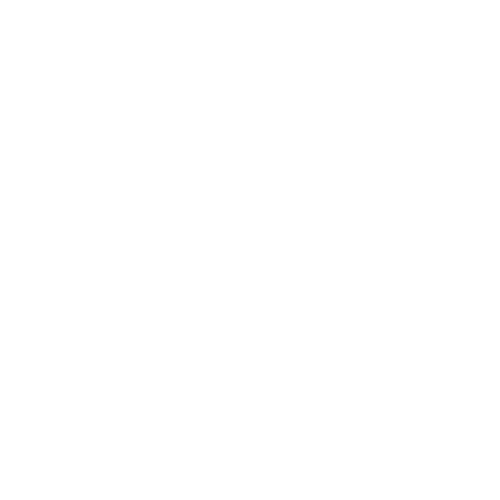

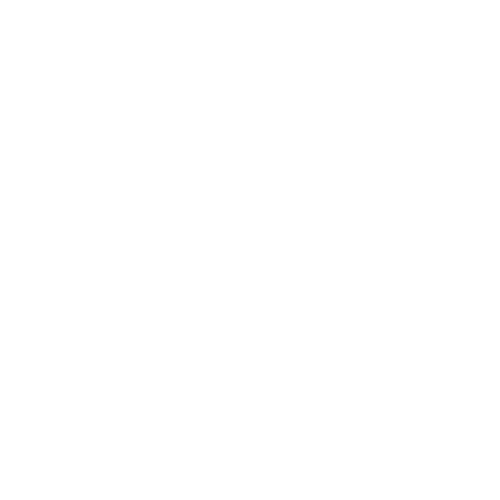

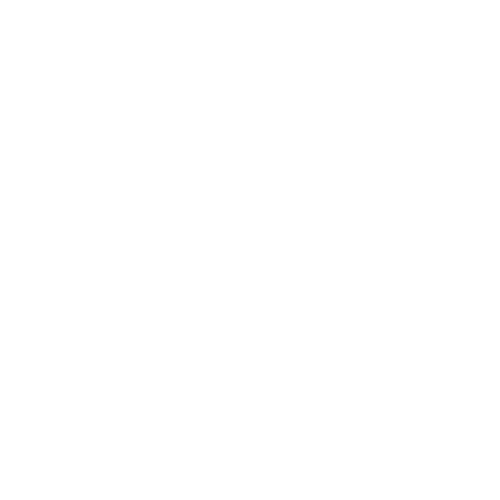

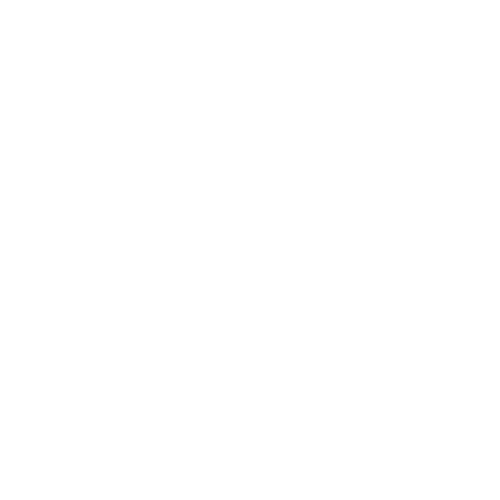

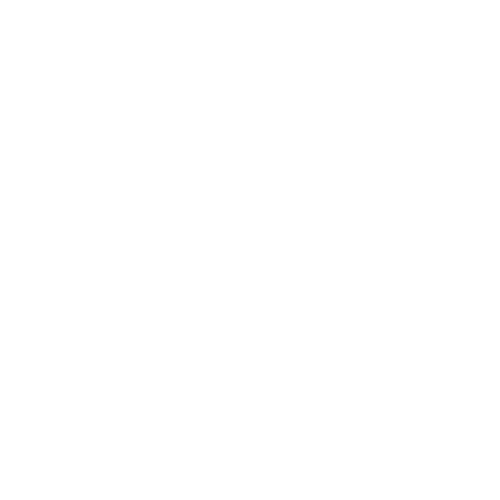

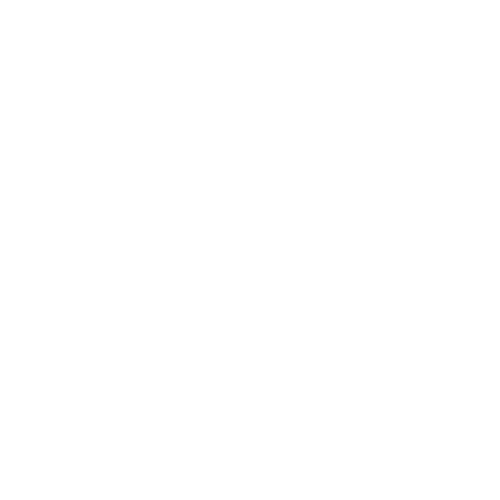

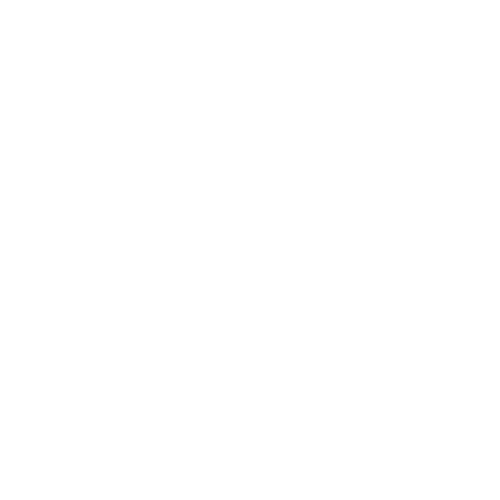

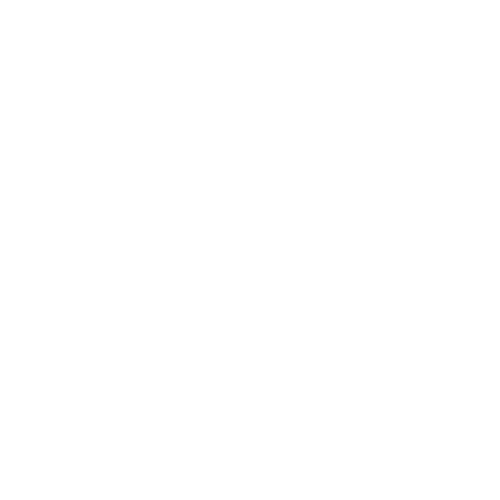

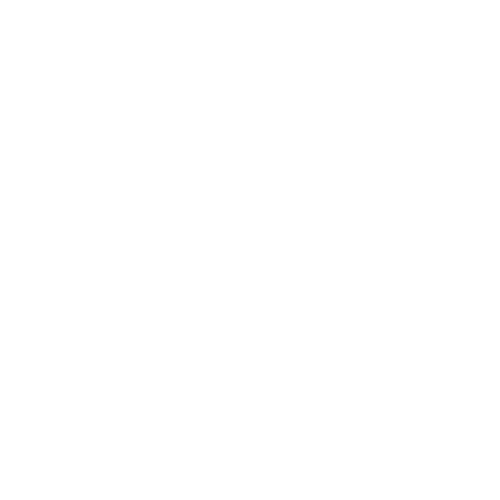

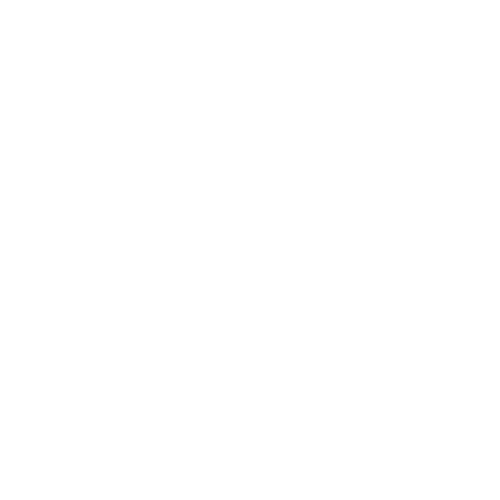

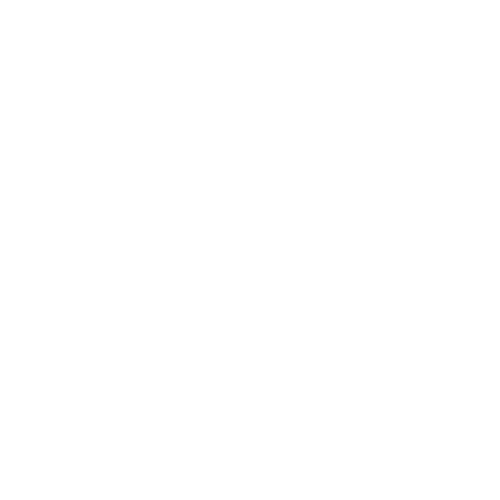

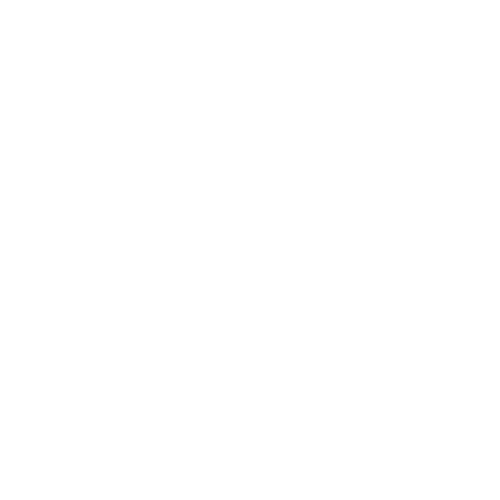

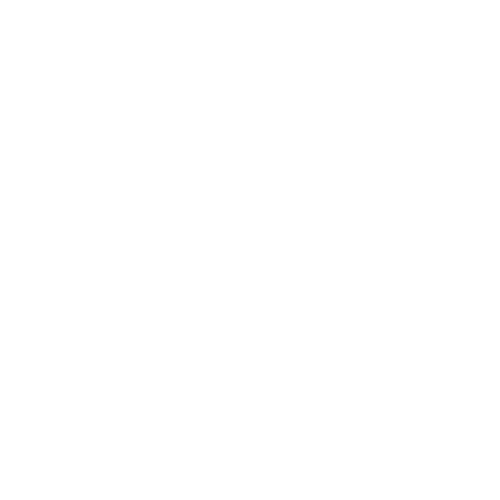

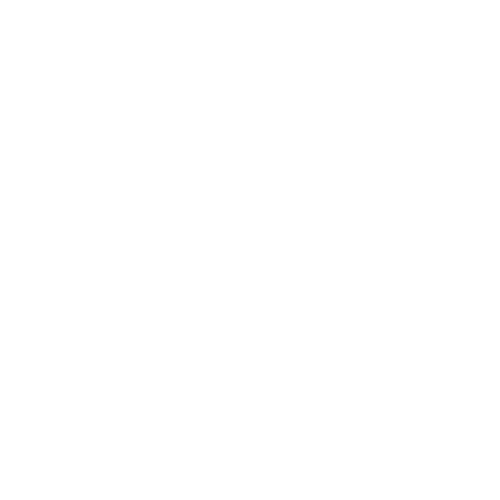

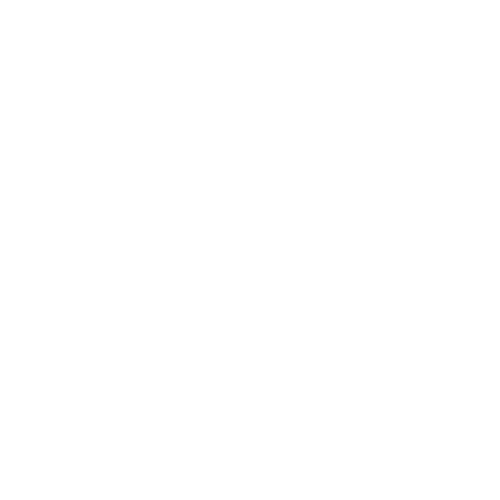

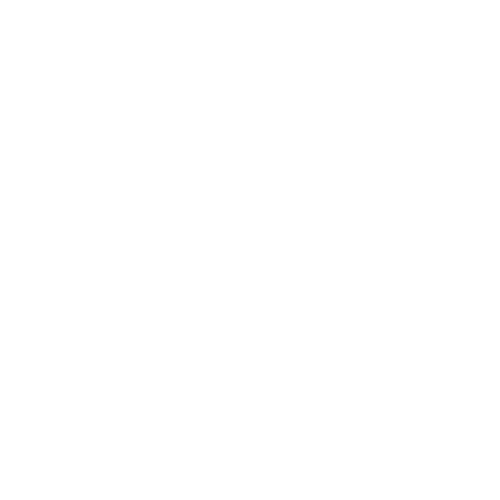

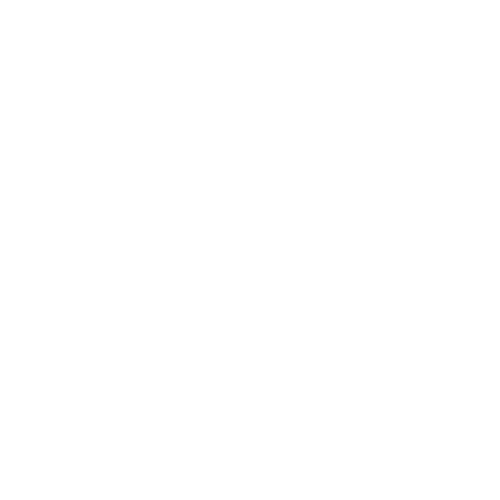

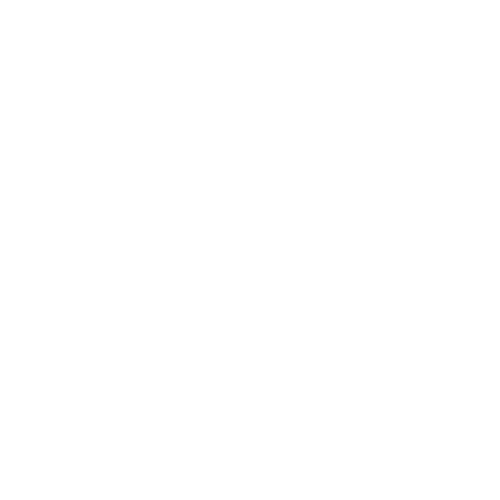

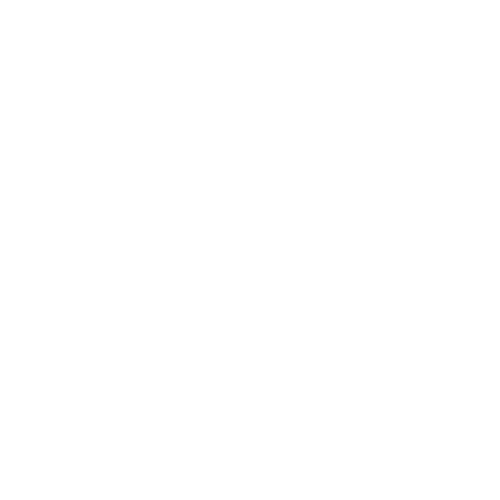

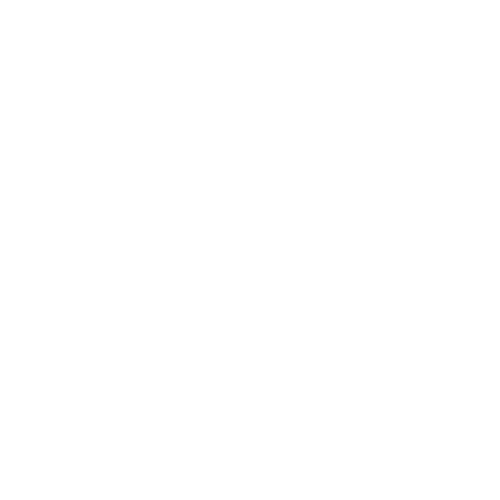

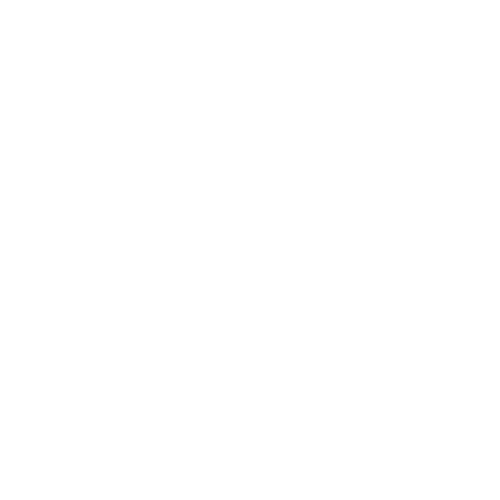

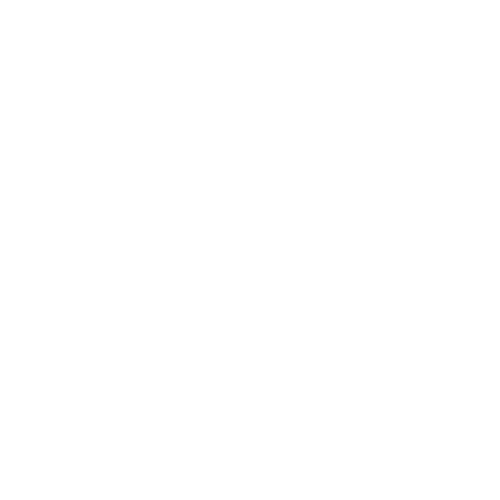

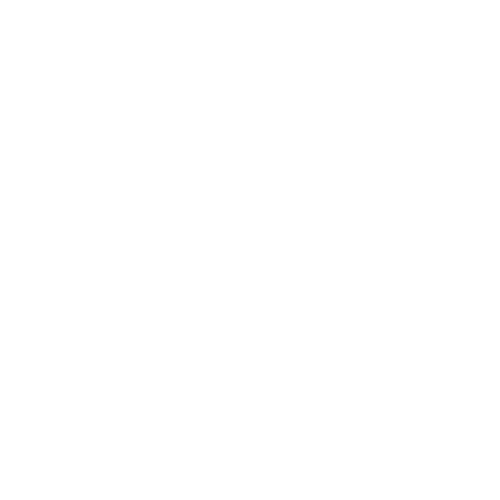

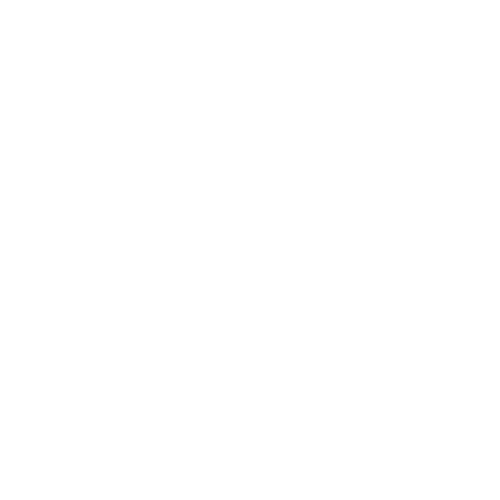

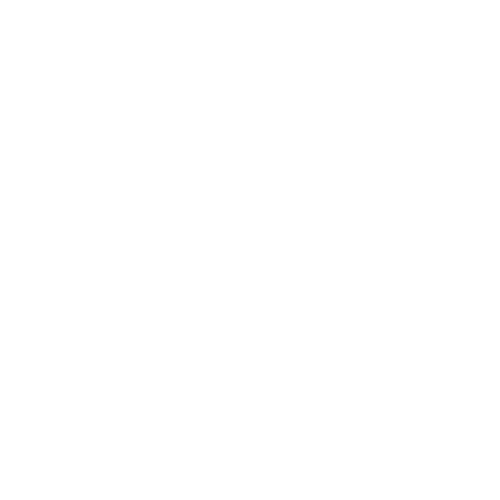

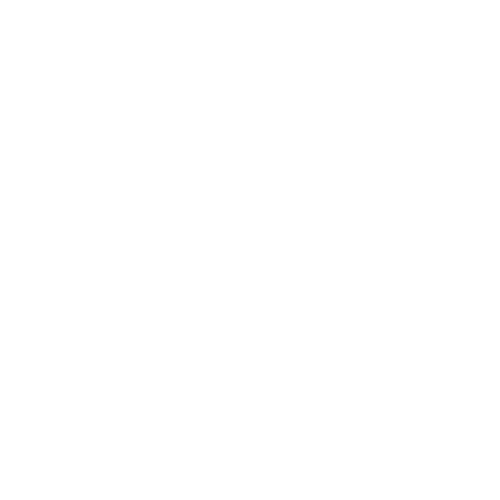

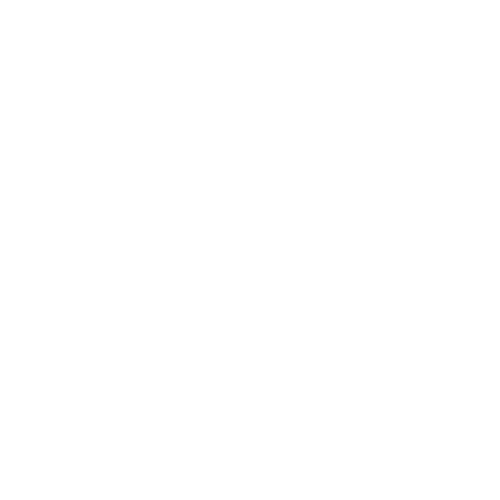

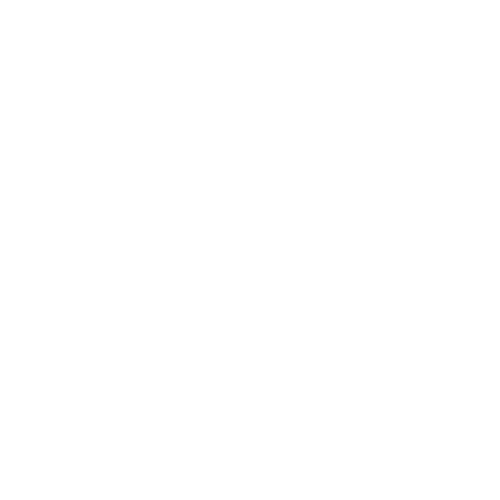

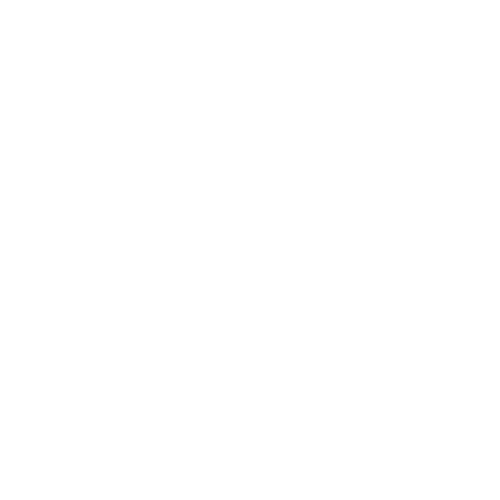

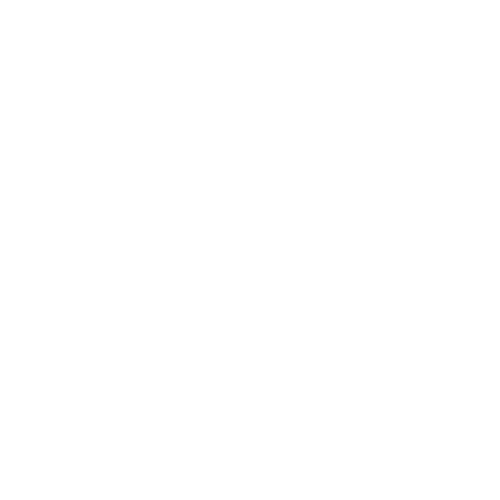

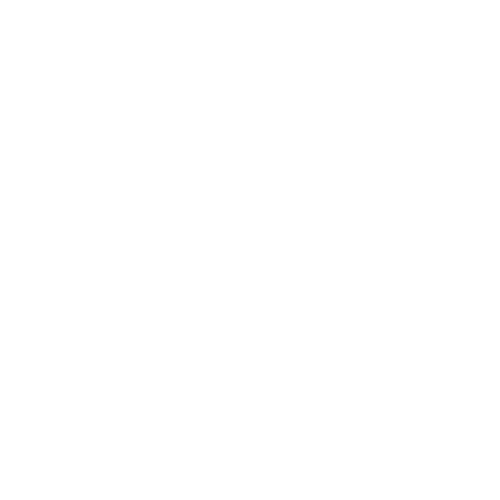

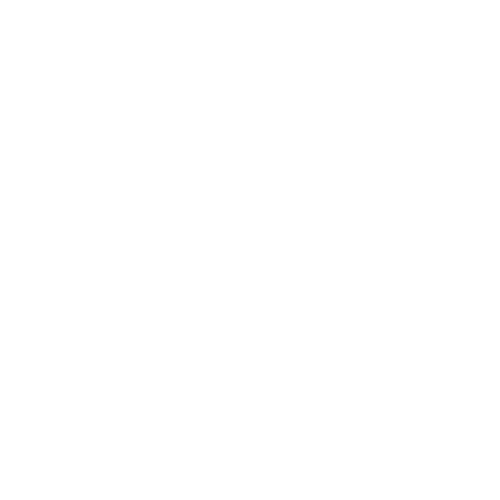

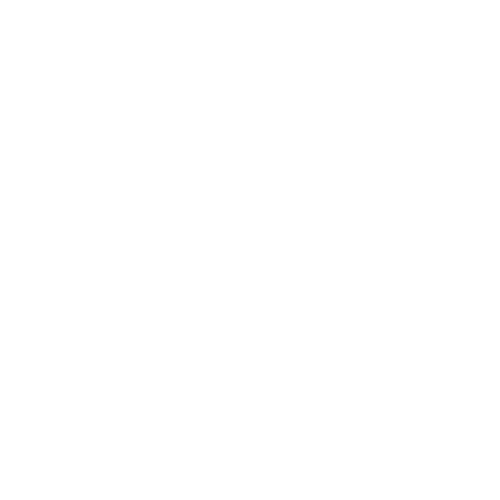

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider
from qutip import Bloch

# =========================================================
# ASSUMED PRE-EXISTING DATA
# =========================================================
# detunings, amplitudes, states already computed
# states[a][d] -> np.ndarray shape (3, Nt)
# MHz, pi defined

X = detunings / (2 * np.pi * MHz)
Y = amplitudes / (2 * np.pi * MHz)

Na = len(amplitudes)
Nd = len(detunings)
Nt = states[0][0].shape[1]

# Fix amplitude index (no slider)
A_FIXED = Na // 2

# =========================================================
# BUILD z_echo MAP
# =========================================================
z_echo = np.array([
    [states[a][d][2, -1] for d in range(Nd)]
    for a in range(Na)
])
z_echo = -z_echo / 2 + 0.5

# =========================================================
# FIGURE + AXES (ONCE)
# =========================================================
fig = plt.figure(figsize=(22, 5))

ax_map       = fig.add_subplot(1, 4, 1)
ax_det_slice = fig.add_subplot(1, 4, 2)
ax_amp_slice = fig.add_subplot(1, 4, 3)
ax_bloch     = fig.add_subplot(1, 4, 4, projection="3d")

# =========================================================
# MAIN MAP
# =========================================================
pcm = ax_map.pcolormesh(X, Y, z_echo, cmap="viridis", vmin=0, vmax=0.5)
fig.colorbar(pcm, ax=ax_map, label="Echo")

line_amp = ax_map.axhline(Y[A_FIXED], color="r", ls="--")
line_det = ax_map.axvline(X[Nd // 2], color="r", ls="--")

ax_map.set_title("Echo Map")
ax_map.set_xlabel("Detuning (MHz)")
ax_map.set_ylabel("Amplitude (MHz)")

# =========================================================
# BLOCH SPHERE (ONCE)
# =========================================================
bloch = Bloch(axes=ax_bloch)
bloch.sphere_alpha = 0.15
bloch.sphere_color = [0.9, 0.9, 0.95]
bloch.frame_color  = "black"
bloch.frame_width  = 1.3
bloch.vector_color = ["#d62728"]
bloch.render()

# =========================================================
# UPDATE FUNCTIONS
# =========================================================
def update_slices(d_idx):
    x = X[d_idx]
    y = Y[A_FIXED]

    # locator lines
    line_amp.set_ydata([y, y])
    line_det.set_xdata([x, x])

    # detuning slice
    ax_det_slice.clear()
    ax_det_slice.plot(X, z_echo[A_FIXED, :], lw=2)
    ax_det_slice.axvline(x, color="r", ls="--")
    ax_det_slice.set_ylim(0, 1)
    ax_det_slice.set_title(f"Amp = {y:.2f} MHz")
    ax_det_slice.set_xlabel("Detuning (MHz)")

    # amplitude slice
    ax_amp_slice.clear()
    ax_amp_slice.plot(Y, z_echo[:, d_idx], lw=2, color="m")
    ax_amp_slice.axvline(y, color="r", ls="--")
    ax_amp_slice.set_ylim(0, 1)
    ax_amp_slice.set_title(f"Detuning = {x:.2f} MHz")
    ax_amp_slice.set_xlabel("Amplitude (MHz)")


def update_bloch(d_idx, t_idx):
    ax_bloch.clear()

    bloch = Bloch(axes=ax_bloch)
    bloch.sphere_alpha = 0.15
    bloch.sphere_color = [0.9, 0.9, 0.95]
    bloch.frame_color  = "black"
    bloch.frame_width  = 1.3
    bloch.vector_color = ["#d62728"]

    v = states[A_FIXED][d_idx][:, t_idx]
    bloch.add_vectors(v)

    bloch.render()
    ax_bloch.set_title(f"t index = {t_idx}")

# =========================================================
# WIDGETS (KEYWORD-ONLY — IMPORTANT)
# =========================================================
d_slider = IntSlider(
    min=0,
    max=Nd - 1,
    step=1,
    value=Nd // 2,
    description="Det idx",
    continuous_update=True,
)

t_slider = IntSlider(
    min=0,
    max=Nt - 1,
    step=10,
    value=0,
    description="Time idx",
    continuous_update=True,
)

# =========================================================
# INTERACTIVE DASHBOARD
# =========================================================
@interact(d_idx=d_slider, t_idx=t_slider)
def dashboard(d_idx, t_idx):
    update_slices(d_idx)
    update_bloch(d_idx, t_idx)
    fig.canvas.draw_idle()

 $\sigma$ = 1102.7 Hz


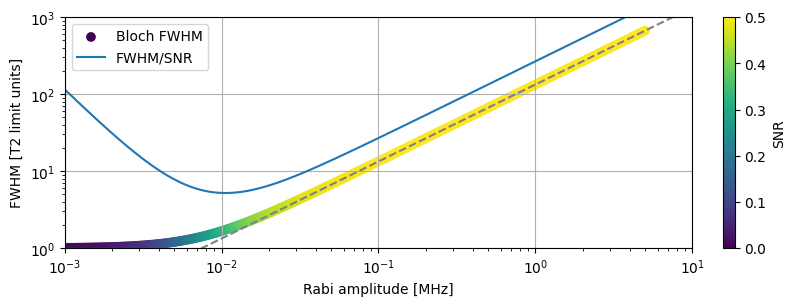

In [4]:
fig = plt.figure(figsize=(10, 3))
ax = fig.add_subplot(111)
find_fwhm_vec_vs_rabi(ax)




In [5]:
from simi.utils import *


def compute_fwhm(ax, pulse_length=40e-6, plot=False):
    qubit_args["cutoff"] = 2e-4
    qubit_args["rabi_points"] = 51
    qubit_args["detuning_points"] = 51
    qubit_args["detuning_span"] = 0.5 * MHz * 2 * pi
    qubit_args["rabi_frequency"] = 50 * MHz * 2 * pi
    qubit_args["eco_pulse"] = True
    qubit_args["pulse_length"] = pulse_length
    detunings, amplitudes, z_echo = run_all(args=qubit_args)

    fwhms, SNRs = find_fwhm(detunings, amplitudes, z_echo)

    if plot:
        ax.plot(
            amplitudes / 2 / pi / MHz,
            fwhms / T2_limit / 2 / pi,
            ".-",
            label=f"{pulse_length / 1e-6:.0f} us",
        )

        ax.scatter(amplitudes / 2 / pi / MHz, fwhms / T2_limit / 2 / pi, c=SNRs)

    return amplitudes, fwhms, SNRs


def plot_fwhm(ax, amplitudes, fwhms, SNRs, **kwargs):
    label = kwargs.get("label", "")

    ax.plot(
        amplitudes / 2 / pi / MHz,
        fwhms / T2_limit / pi,
        ".-",
        label=label,
    )

    # ax.scatter(
    #     amplitudes / 2 / pi / MHz,
    #     fwhms / T2_limit / 2 / pi,
    #     c=SNRs,
    #     label=label,
    #     vmin=0,
    #     vmax=0.2,
    # )

In [6]:


amps, fwhm_1,SNRs_1 = compute_fwhm(ax, 30e-6)
# _, fwhm_2,SNRs_2 = compute_fwhm(ax, 30e-6)
# _, fwhm_3,SNRs_3 = compute_fwhm(ax, 60e-6)





Amplitude = 0/51
Amplitude = 1/51
Amplitude = 2/51
Amplitude = 3/51
Amplitude = 4/51
Amplitude = 5/51
Amplitude = 6/51
Amplitude = 7/51
Amplitude = 8/51
Amplitude = 9/51
Amplitude = 10/51
Amplitude = 11/51
Amplitude = 12/51
Amplitude = 13/51
Amplitude = 14/51
Amplitude = 15/51
Amplitude = 16/51
Amplitude = 17/51
Amplitude = 18/51
Amplitude = 19/51
Amplitude = 20/51
Amplitude = 21/51
Amplitude = 22/51
Amplitude = 23/51
Amplitude = 24/51
Amplitude = 25/51
Amplitude = 26/51
Amplitude = 27/51
Amplitude = 28/51
Amplitude = 29/51
Amplitude = 30/51
Amplitude = 31/51
Amplitude = 32/51
Amplitude = 33/51
Amplitude = 34/51
Amplitude = 35/51
Amplitude = 36/51
Amplitude = 37/51
Amplitude = 38/51
Amplitude = 39/51
Amplitude = 40/51
Amplitude = 41/51
Amplitude = 42/51
Amplitude = 43/51
Amplitude = 44/51
Amplitude = 45/51
Amplitude = 46/51
Amplitude = 47/51
Amplitude = 48/51
Amplitude = 49/51
Amplitude = 50/51


TypeError: find_fwhm() missing 1 required positional argument: 'echo'

FWHM (calculated): 94192.80180123798
FWHM (calculated): 4509.225488639906
FWHM (calculated): 4599.083269854849
FWHM (calculated): 4267.01169852163
FWHM (calculated): 4453.403754945161
FWHM (calculated): 4641.9066448449
FWHM (calculated): 4364.861855337406
FWHM (calculated): 4422.993488371263
FWHM (calculated): 4442.1645621587
FWHM (calculated): 4367.11075589371
FWHM (calculated): 4464.736420158619
FWHM (calculated): 4274.811064917166
FWHM (calculated): 4404.273408246374
FWHM (calculated): 4345.650982814942
FWHM (calculated): 3492.122550648165
FWHM (calculated): 4319.5563293037985
FWHM (calculated): 4259.968680010238
FWHM (calculated): 4335.788596599101
FWHM (calculated): 3925.5408343413237
FWHM (calculated): 4525.63910304437
FWHM (calculated): 4249.0421332409305
FWHM (calculated): 4236.851902659743
FWHM (calculated): 3033.0001244485434
FWHM (calculated): 4843.2013683388695
FWHM (calculated): 4157.095221569852
FWHM (calculated): 3902.9902148344268
FWHM (calculated): 4029.8770000477602
F

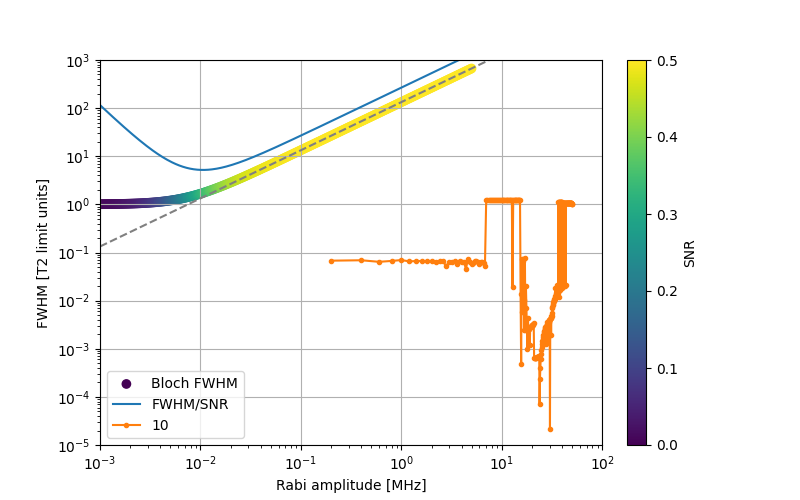

In [ ]:


fwhms, SNRs = find_fwhm(detunings, amplitudes, z_echo,echo=True)



fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111)

find_fwhm_vec_vs_rabi(ax)


# # len(SNRs)


plot_fwhm(ax, amplitudes[1:], fwhms[1:], SNRs[1:], label="10")
# plot_fwhm(ax, amps[1:], fwhm_2[1:], SNRs_2[1:], label="30")
# plot_fwhm(ax, amps[1:], fwhm_3[1:], SNRs_3[1:], label="60")

# plt.xscale('linear')
# plt.yscale('linear')
plt.xlim(1e-3, 1e2)
plt.ylim(1e-5, 1e3)

plt.legend()

plt.show()